In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob
import pickle
from google.colab import drive

import glob
import cv2
import os
import json
import shutil
from PIL import Image
from imageio import imread
import imutils
from google.colab import drive
from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization, GaussianNoise,Input
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
pip install split-folders

In [ ]:
pip install dtreeviz;

     |████████████████████████████████| 61 kB 246 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=8e9982fced9745b42561309300660d2a2e64bc01d7df53ceba6c3187f19320e1
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/Data/RIM-ONE_DL_images.zip ./
!unzip RIM-ONE_DL_images.zip

Archive:  RIM-ONE_DL_images.zip
   creating: RIM-ONE_DL_images/
   creating: RIM-ONE_DL_images/glaucoma/
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im069.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im103.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im113.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im117.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im118.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im120.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im121.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im122.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im135.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im144.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im158.png  
 extracting: RIM-ONE_DL_images/glaucoma/r1_Im167.png  
 extracting: RIM-ONE_DL_images/glaucoma/r2_Im257.png  
 extracting: RIM-ONE_DL_images/glaucoma/r2_Im258.png  
 extracting: RIM-ONE_DL_images/glaucoma/r2_Im260.png  
 extracting: RIM-ONE_DL_images/glaucoma/r2_Im263.png  
 extracting: RI

In [ ]:
!cp /content/gdrive/MyDrive/Data/RIM-ONE_DL_reference_segmentations.zip ./
!unzip RIM-ONE_DL_reference_segmentations.zip;

Archive:  RIM-ONE_DL_reference_segmentations.zip
   creating: RIM-ONE_DL_reference_segmentations/
   creating: RIM-ONE_DL_reference_segmentations/glaucoma/
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im069-1-Cup-T.png  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im069-1-Cup-T.txt  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im069-1-Disc-T.png  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im069-1-Disc-T.txt  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im103-1-Cup-T.png  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im103-1-Cup-T.txt  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im103-1-Disc-T.png  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im103-1-Disc-T.txt  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im113-1-Cup-T.png  
  inflating: RIM-ONE_DL_reference_segmentations/glaucoma/r1_Im113-1-Cup-T.txt  
  inflating: RIM-ONE_DL_reference_segmen

In [ ]:
data = pd.read_excel (r'/content/gdrive/MyDrive/Data/1/normal.xlsx') 
df_normal = pd.DataFrame(data, columns= ['Path','NumberOfWhitePixels','ID'])
df_normal

Path  NumberOfWhitePixels  \
0    /content/RIM-ONE_DL_reference_segmentations/no...              14253.0   
1    /content/RIM-ONE_DL_reference_segmentations/no...              67802.0   
2    /content/RIM-ONE_DL_reference_segmentations/no...              29312.0   
3    /content/RIM-ONE_DL_reference_segmentations/no...             102416.0   
4    /content/RIM-ONE_DL_reference_segmentations/no...              36079.0   
..                                                 ...                  ...   
621  /content/RIM-ONE_DL_reference_segmentations/no...              68016.0   
622  /content/RIM-ONE_DL_reference_segmentations/no...               5329.0   
623  /content/RIM-ONE_DL_reference_segmentations/no...              52036.0   
624  /content/RIM-ONE_DL_reference_segmentations/no...               2330.0   
625  /content/RIM-ONE_DL_reference_segmentations/no...              37943.0   

        ID  
0      0.0  
1      1.0  
2      2.0  
3      3.0  
4      4.0  
..     ...  
621  621.0  
622  622.0  
623  623.0  
624  624.0  
625  625.0  

[626 rows x 3 columns]

In [ ]:
data = pd.read_excel (r'/content/gdrive/MyDrive/Data/1/glaucoma.xlsx') 
df_glaucoma = pd.DataFrame(data, columns= ['Path','NumberOfWhitePixels','ID'])
df_glaucoma

Path  NumberOfWhitePixels  \
0    /content/RIM-ONE_DL_reference_segmentations/gl...              75478.0   
1    /content/RIM-ONE_DL_reference_segmentations/gl...              97725.0   
2    /content/RIM-ONE_DL_reference_segmentations/gl...              32176.0   
3    /content/RIM-ONE_DL_reference_segmentations/gl...              86623.0   
4    /content/RIM-ONE_DL_reference_segmentations/gl...              28931.0   
..                                                 ...                  ...   
339  /content/RIM-ONE_DL_reference_segmentations/gl...              55756.0   
340  /content/RIM-ONE_DL_reference_segmentations/gl...              18742.0   
341  /content/RIM-ONE_DL_reference_segmentations/gl...              59035.0   
342  /content/RIM-ONE_DL_reference_segmentations/gl...              27157.0   
343  /content/RIM-ONE_DL_reference_segmentations/gl...              78465.0   

        ID  
0      0.0  
1      1.0  
2      2.0  
3      3.0  
4      4.0  
..     ...  
339  339.0  
340  340.0  
341  341.0  
342  342.0  
343  343.0  

[344 rows x 3 columns]

In [ ]:
len(df_normal)

626

In [ ]:
len(df_glaucoma)

344

In [ ]:
n_mask = []
for i in range(len(df_normal)):
  n= cv2.imread(df_normal['Path'][i])#,cv2.IMREAD_GRAYSCALE)
  #(thresh, im_bw) = cv2.threshold(n, 128, 255, cv2.THRESH_BINARY)

  #print(df_normal['Path'][i])
  n_mask.append(n)
  #plt.imshow(n)
  #break


In [ ]:
g_mask = []
for i in range(len(df_glaucoma)):
  n= cv2.imread(df_glaucoma['Path'][i])#,cv2.IMREAD_GRAYSCALE)n
  #(thresh, im_bw) = cv2.threshold(n, 128, 255, cv2.THRESH_BINARY)
  #print(df_normal['Path'][i])
  g_mask.append(n)
  #plt.imshow(n)
  #break

In [ ]:
n_mask[0].shape

(462, 462)

In [ ]:
n_white_pix = np.sum(n_mask[0] == 255)
print('Number of white pixels:', n_white_pix)

Number of white pixels: 14253


In [ ]:
n_white_pix = np.sum(n_mask[0] == 0)
print('Number of white pixels:', n_white_pix)

Number of white pixels: 199191


In [ ]:
n_mask[0].size

213444

In [ ]:
##No need to run JUST First Time

file_name = r"/content/gdrive/MyDrive/Data/glaucoma.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame
g_white_pix = []
for i in range(0,len(g_mask)):
  g_white_pix.append(np.sum(g_mask[i] == 255))


print(len(g_white_pix))
df['NumberOfWhitePixels'] = g_white_pix
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/glaucoma.xlsx") 


file_name = r"/content/gdrive/MyDrive/Data/normal.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame
n_white_pix = []
for i in range(0,len(n_mask)):
  n_white_pix.append(np.sum(n_mask[i] == 255))


print(len(n_white_pix))
df['NumberOfWhitePixels'] = n_white_pix
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/normal.xlsx") 

344


In [ ]:
data = pd.read_excel (r'/content/gdrive/MyDrive/Data/2/normal.xlsx') 
df_normal_img = pd.DataFrame(data , columns= ["Path",	"CDR",	"I_rim",	"S_rim",	"N_rim",	"T_rim"])
df_normal_img.head()

Path   CDR  I_rim  S_rim  N_rim  \
0  /content/RIM-ONE_DL_images/normal/r1_Im001.png  0.46  44229  45873  40860   
1  /content/RIM-ONE_DL_images/normal/r1_Im003.png  0.53  57549  50154  58146   
2  /content/RIM-ONE_DL_images/normal/r1_Im004.png  0.60  39216  63390  52593   
3  /content/RIM-ONE_DL_images/normal/r1_Im006.png  0.46  22884  28011  33057   
4  /content/RIM-ONE_DL_images/normal/r1_Im008.png  0.38  24207  22413  22251   

   T_rim  
0  31782  
1  55644  
2  41655  
3  20349  
4  28677

In [ ]:
data = pd.read_excel (r'/content/gdrive/MyDrive/Data/2/glaucoma.xlsx') 
df_glaucoma_img = pd.DataFrame(data,columns= ["Path",	"CDR",	"I_rim",	"S_rim",	"N_rim",	"T_rim"])
df_glaucoma_img

Path   CDR  I_rim  S_rim  \
0     /content/RIM-ONE_DL_images/glaucoma/r1_Im069.png  0.88  21447  16875   
1     /content/RIM-ONE_DL_images/glaucoma/r1_Im103.png  0.61  48798  35445   
2     /content/RIM-ONE_DL_images/glaucoma/r1_Im113.png  0.65  31572  35175   
3     /content/RIM-ONE_DL_images/glaucoma/r1_Im117.png  0.51  30117  50880   
4     /content/RIM-ONE_DL_images/glaucoma/r1_Im118.png  0.59  19512  47985   
..                                                 ...   ...    ...    ...   
167  /content/RIM-ONE_DL_images/glaucoma/r3_S-30-L_...  0.58  30207  21825   
168  /content/RIM-ONE_DL_images/glaucoma/r3_S-31-L_...  0.68  32952  37275   
169  /content/RIM-ONE_DL_images/glaucoma/r3_S-32-L_...  0.65  25872  25065   
170  /content/RIM-ONE_DL_images/glaucoma/r3_S-33-R_...  0.56  28647  32604   
171  /content/RIM-ONE_DL_images/glaucoma/r3_S-35-R_...  0.59  34656  39654   

     N_rim  T_rim  
0    15066  13878  
1    45390  35391  
2    25458  26235  
3    42435  44103  
4    32517  48741  
..     ...    ...  
167  31731  34512  
168  28434  36663  
169  24180  23580  
170  33084  28074  
171  42477  38772  

[172 rows x 6 columns]

In [ ]:
n_img = []
for i in range(len(df_normal_img)):
  n= plt.imread(df_normal_img['Path'][i])
  #(thresh, im_bw) = cv2.threshold(n, 128, 255, cv2.THRESH_BINARY)

  #print(df_normal_img['Path'][i])
  n_img.append(n)
  #plt.imshow(n)
  #break


In [ ]:
g_img = []
for i in range(len(df_glaucoma_img)):
  n= plt.imread(df_glaucoma_img['Path'][i])
  #(thresh, im_bw) = cv2.threshold(n, 128, 255, cv2.THRESH_BINARY)

  #print(df_glaucoma_img['Path'][i])
  g_img.append(n)
  #plt.imshow(n)
  #break

In [ ]:
len(n_img)

313

Text(0.5, 1.0, 'Disc mask for glaucoma case')

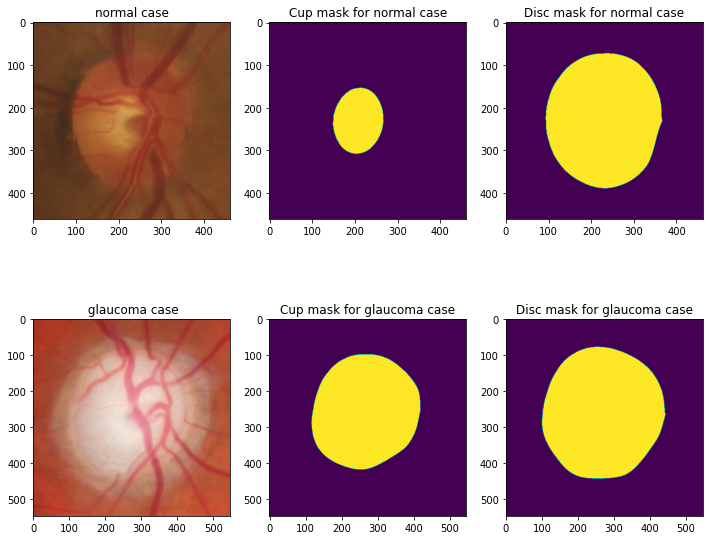

In [ ]:
fig = plt.figure(figsize=(12, 10))

fig.add_subplot(2, 3, 1)
#fig.tight_layout()
plt.imshow(n_img[0])
plt.title("normal case")

fig.add_subplot(2, 3, 2)
#fig.tight_layout()
plt.imshow(n_mask[0])
plt.title("Cup mask for normal case")

fig.add_subplot(2, 3, 3)
#fig.tight_layout()
plt.imshow(n_mask[1])
plt.title("Disc mask for normal case")



fig.add_subplot(2, 3, 4)
#fig.tight_layout()
plt.imshow(g_img[0])
plt.title(" glaucoma case")

fig.add_subplot(2, 3, 5)
#fig.tight_layout()
plt.imshow(g_mask[0])
plt.title("Cup mask for glaucoma case")

fig.add_subplot(2, 3, 6)
#fig.tight_layout()
plt.imshow(g_mask[1])
plt.title("Disc mask for glaucoma case")


In [ ]:

n_num_white_pix = df_normal['NumberOfWhitePixels']
g_num_white_pix = df_glaucoma['NumberOfWhitePixels']

In [ ]:
#Calculate CDR for Normal and Glaucoma
##No Need to Run Again Just First Time


#Normal

n_CDR = []
for i in range(0,len(n_num_white_pix),2):
  x1 = n_num_white_pix[i]
  x2 = n_num_white_pix[i+1]
  x =float("{:.2f}".format(np.sqrt(x1/x2))) 
  n_CDR.append(x)
print(len(n_CDR))

file_name = r"/content/gdrive/MyDrive/Data/2/normal.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['CDR'] = n_CDR
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/normal.xlsx") 



#Glaucoma

g_CDR = []
for i in range(0,len(g_num_white_pix),2):
  x1 = g_num_white_pix[i]
  x2 = g_num_white_pix[i+1]
  x = float("{:.2f}".format(np.sqrt(x1/x2))) 
  g_CDR.append(x)
print(len(g_CDR))

file_name = r"/content/gdrive/MyDrive/Data/2/glaucoma.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['CDR'] = g_CDR
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/glaucoma.xlsx") 

313
172


In [ ]:
##Calculate the Diameter of Disc to know it's type (Small, Meduim, Large) ## Need to Think Again Abou Pixel and MM.
n_diam = []
for i in range(1, len(n_num_white_pix), 2):
  x = n_num_white_pix[i]
  x = float("{:.3f}".format(np.sqrt(x/np.pi))) 
  n_diam.append(x)

n_diam[0]*0.2645833333

38.8694083284364

In [ ]:
should_be_glaucoma = df_normal_img[ df_normal_img['CDR'] > 0.45]
should_be_normal = df_glaucoma_img[ df_glaucoma_img['CDR'] <= 0.45]

In [ ]:
print(len(should_be_glaucoma), len(should_be_normal))

88 9


In [ ]:
should_be_glaucoma

Path   CDR   ID
0       /content/RIM-ONE_DL_images/normal/r1_Im001.png  0.46    0
1       /content/RIM-ONE_DL_images/normal/r1_Im003.png  0.53    1
2       /content/RIM-ONE_DL_images/normal/r1_Im004.png  0.60    2
3       /content/RIM-ONE_DL_images/normal/r1_Im006.png  0.46    3
7       /content/RIM-ONE_DL_images/normal/r1_Im014.png  0.65    7
..                                                 ...   ...  ...
293  /content/RIM-ONE_DL_images/normal/r3_N-71-L_le...  0.51  293
294  /content/RIM-ONE_DL_images/normal/r3_N-72-R_le...  0.53  294
302  /content/RIM-ONE_DL_images/normal/r3_N-81-L_le...  0.56  302
303  /content/RIM-ONE_DL_images/normal/r3_N-82-R_le...  0.55  303
307  /content/RIM-ONE_DL_images/normal/r3_N-86-R_le...  0.46  307

[88 rows x 3 columns]

In [ ]:
df_normal_img[ df_normal_img['CDR'] == 0.45]

Path   CDR   ID
6    /content/RIM-ONE_DL_images/normal/r1_Im012.png  0.45    6
38   /content/RIM-ONE_DL_images/normal/r1_Im061.png  0.45   38
66   /content/RIM-ONE_DL_images/normal/r1_Im143.png  0.45   66
178  /content/RIM-ONE_DL_images/normal/r2_Im154.png  0.45  178
216  /content/RIM-ONE_DL_images/normal/r2_Im232.png  0.45  216
225  /content/RIM-ONE_DL_images/normal/r2_Im250.png  0.45  225

In [ ]:
n_CDR_45 = df_normal[df_normal['Path'].str.contains('r1_Im012')]
n_CDR_45

Path  NumberOfWhitePixels  \
12  /content/RIM-ONE_DL_reference_segmentations/no...              14589.0   
13  /content/RIM-ONE_DL_reference_segmentations/no...              72693.0   

      ID  
12  12.0  
13  13.0

In [ ]:
n_CDR_45 = df_normal[df_normal['Path'].str.contains('r1_Im061')]
n_CDR_45

Path  NumberOfWhitePixels  \
76  /content/RIM-ONE_DL_reference_segmentations/no...              22086.0   
77  /content/RIM-ONE_DL_reference_segmentations/no...             110791.0   

      ID  
76  76.0  
77  77.0

In [ ]:
n_CDR_45 = df_normal[df_normal['Path'].str.contains('r1_Im143')]
n_CDR_45

Path  NumberOfWhitePixels  \
132  /content/RIM-ONE_DL_reference_segmentations/no...              10800.0   
133  /content/RIM-ONE_DL_reference_segmentations/no...              53820.0   

        ID  
132  132.0  
133  133.0

In [ ]:
n_CDR_45 = df_normal[df_normal['Path'].str.contains('r2_Im154')]
n_CDR_45

Path  NumberOfWhitePixels  \
356  /content/RIM-ONE_DL_reference_segmentations/no...              31928.0   
357  /content/RIM-ONE_DL_reference_segmentations/no...             154315.0   

        ID  
356  356.0  
357  357.0

In [ ]:
n_CDR_45 = df_normal[df_normal['Path'].str.contains('r2_Im232')]
n_CDR_45

Path  NumberOfWhitePixels  \
432  /content/RIM-ONE_DL_reference_segmentations/no...              29717.0   
433  /content/RIM-ONE_DL_reference_segmentations/no...             144426.0   

        ID  
432  432.0  
433  433.0

In [ ]:
n_CDR_45 = df_normal[df_normal['Path'].str.contains('r2_Im250')] ##This one 
n_CDR_45

Path  NumberOfWhitePixels  \
450  /content/RIM-ONE_DL_reference_segmentations/no...              40280.0   
451  /content/RIM-ONE_DL_reference_segmentations/no...             195519.0   

        ID  
450  450.0  
451  451.0

In [ ]:
# Manually I add the id // for CDR = 0.5
#n_id_should_be_glaucoma = [1, 2, 7, 8, 13,14,17,22,23,25,29,30,31,32,36,37,53,59,67,68,69,70,82,83,84,85,105,106,122,126,142,170,171,182,183,189,194,198,203,207,210,220,224,228,234,241,275,276,278,279,280,285,286,293,294,302,303]

#len(n_id_should_be_glaucoma)

57

In [ ]:
n_id_should_be_glaucoma = []
n_id_should_be_glaucoma = should_be_glaucoma['ID'].tolist()
len(n_id_should_be_glaucoma)

88

In [ ]:
n_id_should_be_glaucoma[2]

7

In [ ]:
# Save The Disc and Cup Size of Normal Case their CDR > 0.46

n_disc_size = []
n_cup_size = []
for i in range(len(n_id_should_be_glaucoma)):
  id = should_be_glaucoma['ID'][n_id_should_be_glaucoma[i]]
  id_cup = id*2
  id_disc = id_cup + 1
  n_disc_size.append((id_disc, df_normal['NumberOfWhitePixels'][id_disc]))
  n_cup_size.append((id_cup, df_normal['NumberOfWhitePixels'][id_cup]))
len(n_disc_size)

88

In [ ]:
n_disc_size[0][1]

102416.0

In [ ]:
n_cup_size[0][0]

2

In [ ]:
# Compare Disc size of these disc with disc its CDR = 0.5
c_big_disc = []
c_small_disc = []
#c_big_disc_small_cup = []
#c_small_disc_big_cup = []
for i in range(len(n_disc_size)):
  if (n_CDR_45['NumberOfWhitePixels'][451] < n_disc_size[i][1]): #& (n_CDR_45['NumberOfWhitePixels'][450] < n_cup_size[i][1]):
    c_big_disc.append(n_disc_size[i])
  elif (n_CDR_45['NumberOfWhitePixels'][451] > n_disc_size[i][1]): #& (n_CDR_45['NumberOfWhitePixels'][450] > n_cup_size[i][1]):
    c_small_disc.append(n_disc_size[i])

In [ ]:
len(c_big_disc)

11

In [ ]:
len(c_small_disc)

77

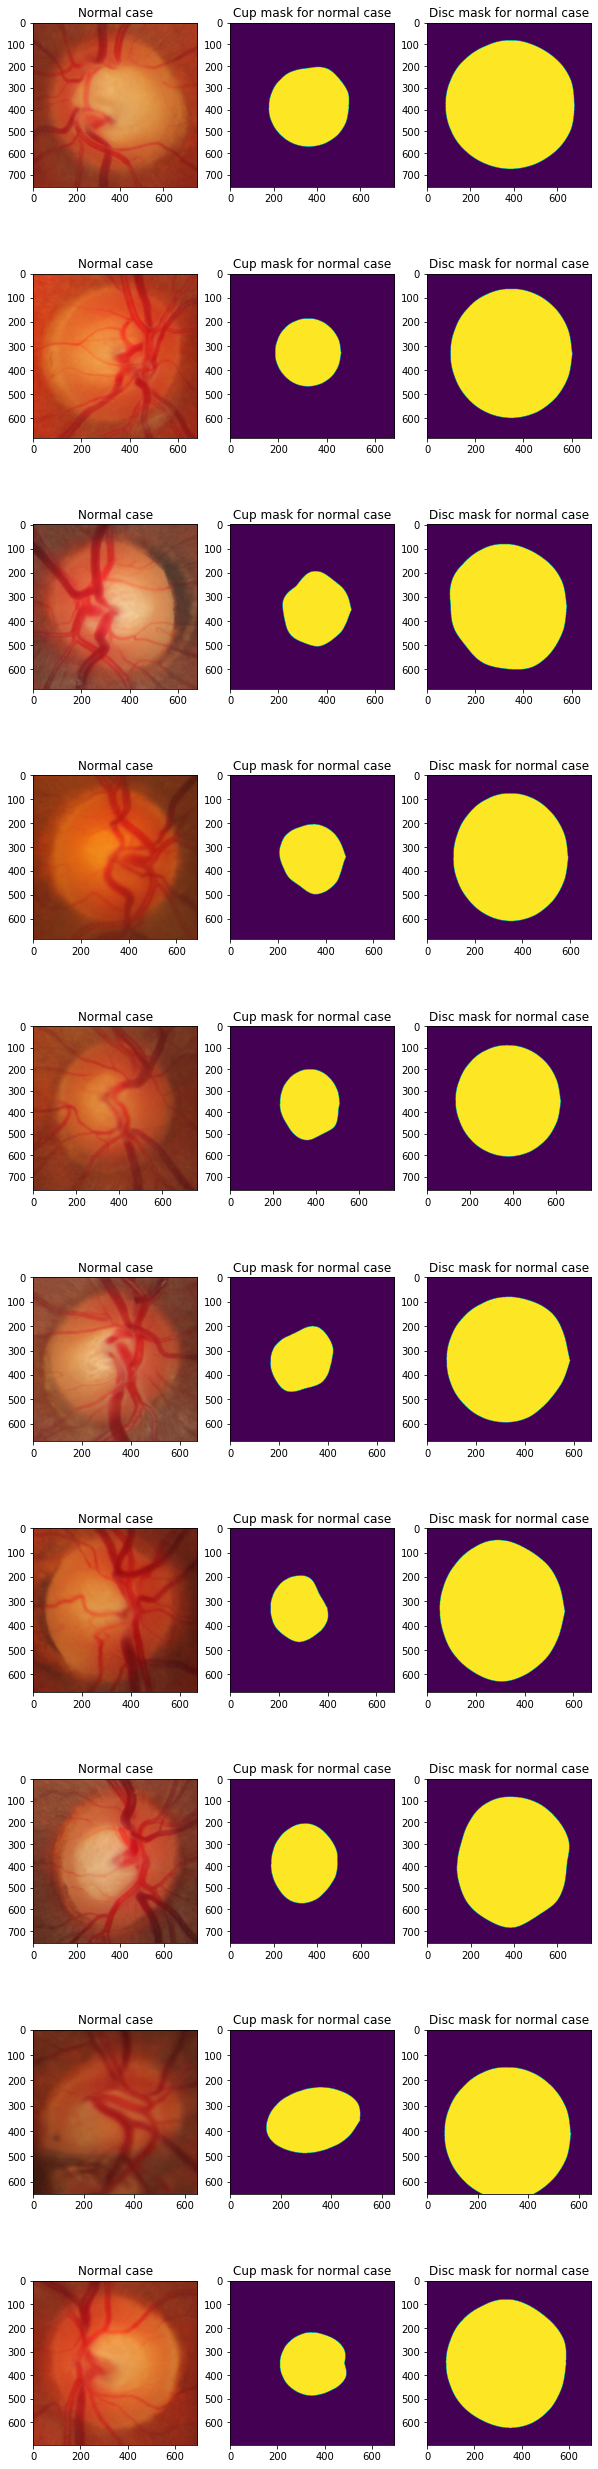

In [ ]:
#big 11
index = 1
fig = plt.figure(figsize=(10, 50))
for i in range(10):  
    fig.add_subplot(11, 3, index)
    #fig.tight_layout()
    id = c_big_disc[i][0]
    id =int(id / 2)
    plt.imshow(n_img[id])
    plt.title("Normal case")
    
    
    id_d = int(c_big_disc[i][0])
    id_c = int(id_d - 1)

    fig.add_subplot(11, 3, index+1)
    #fig.tight_layout()
    plt.imshow(n_mask[id_c])
    plt.title("Cup mask for normal case")
    

    fig.add_subplot(11, 3, index+2)
    #fig.tight_layout()
    plt.imshow(n_mask[id_d])
    plt.title("Disc mask for normal case")
    

    index = index + 3


We can see here tha the disc and cup have the big size ==> CDR > 0.46

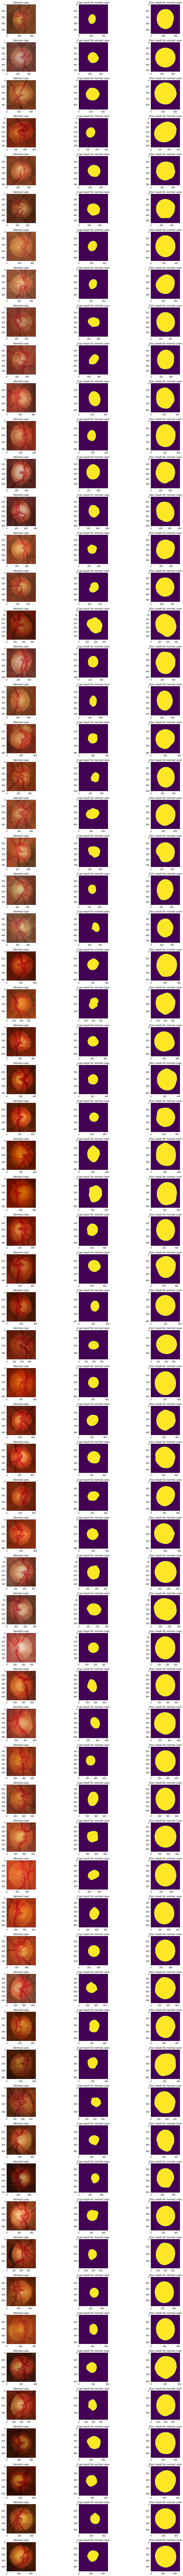

In [ ]:
#small 77
index = 1
fig = plt.figure(figsize=(15, 200))
for i in range(68):  
    fig.add_subplot(77, 3, index)
    #fig.tight_layout()
    id = c_small_disc[i][0]
    id =int(id / 2)
    plt.imshow(n_img[id])
    plt.title("Normal case")
    
    
    id_d = int(c_small_disc[i][0])
    id_c = int(id_d - 1)

    fig.add_subplot(77, 3, index+1)
    #fig.tight_layout()
    plt.imshow(n_mask[id_c])
    plt.title("Cup mask for normal case")
    fig

    fig.add_subplot(77, 3, index+2)
    #fig.tight_layout()
    plt.imshow(n_mask[id_d])
    plt.title("Disc mask for normal case")
    

    index = index + 3
fig.tight_layout()    
plt.show()

We can see here that the disc and cup have small size compared to normal case ==> CDR > 0.5

In [ ]:
#g_id_should_be_normal = [23,24,43,44,45,52,71,74,91,98,103,117,118]
#len(g_id_should_be_normal)


13

In [ ]:
g_id_should_be_normal = []
g_id_should_be_normal = should_be_normal['ID'].tolist()
len(g_id_should_be_normal)

9

In [ ]:
g_disc_size = []
g_cup_size = []
for i in range(len(g_id_should_be_normal)):
  id = should_be_normal['ID'][g_id_should_be_normal[i]]
  id_cup = id*2
  id_disc = id_cup + 1
  g_disc_size.append((id_disc, df_glaucoma['NumberOfWhitePixels'][id_disc]))
  g_cup_size.append((id_cup, df_glaucoma['NumberOfWhitePixels'][id_cup]))
len(g_disc_size)

9

In [ ]:
len(g_cup_size)

9

In [ ]:
c_big_disc = []
c_small_disc = []
for i in range(len(g_disc_size)):
  if (n_CDR_45['NumberOfWhitePixels'][451] < g_disc_size[i][1]) & (n_CDR_45['NumberOfWhitePixels'][450] < g_cup_size[i][1]):
    c_big_disc.append(g_disc_size[i])
  elif (n_CDR_45['NumberOfWhitePixels'][451] > g_disc_size[i][1]) & (n_CDR_45['NumberOfWhitePixels'][450] > g_cup_size[i][1]):
    c_small_disc.append(g_disc_size[i])

In [ ]:
print(len(c_small_disc), len(c_big_disc))

8 1


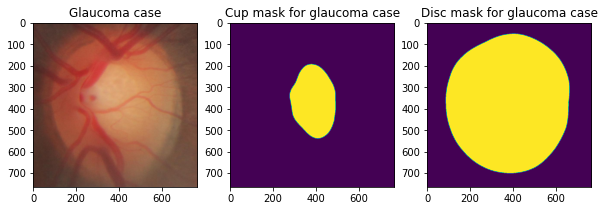

In [ ]:
#big 1 
index = 1
fig = plt.figure(figsize=(10, 18))
for i in range(1):  
    fig.add_subplot(1, 3, index)
    #fig.tight_layout()
    id = c_big_disc[i][0]
    id = int(id /2)
    plt.imshow(g_img[id])
    plt.title("Glaucoma case")
    
    
    id_d = int(c_big_disc[i][0])
    id_c = int(id_d - 1)

    fig.add_subplot(1, 3, index+1)
    #fig.tight_layout()
    plt.imshow(g_mask[id_c])
    plt.title("Cup mask for glaucoma case")
    

    fig.add_subplot(1, 3, index+2)
    #fig.tight_layout()
    plt.imshow(g_mask[id_d])
    plt.title("Disc mask for glaucoma case")
    

    index = index + 3

We can see here the disc is big compared to cup that is why CDR < 0.5

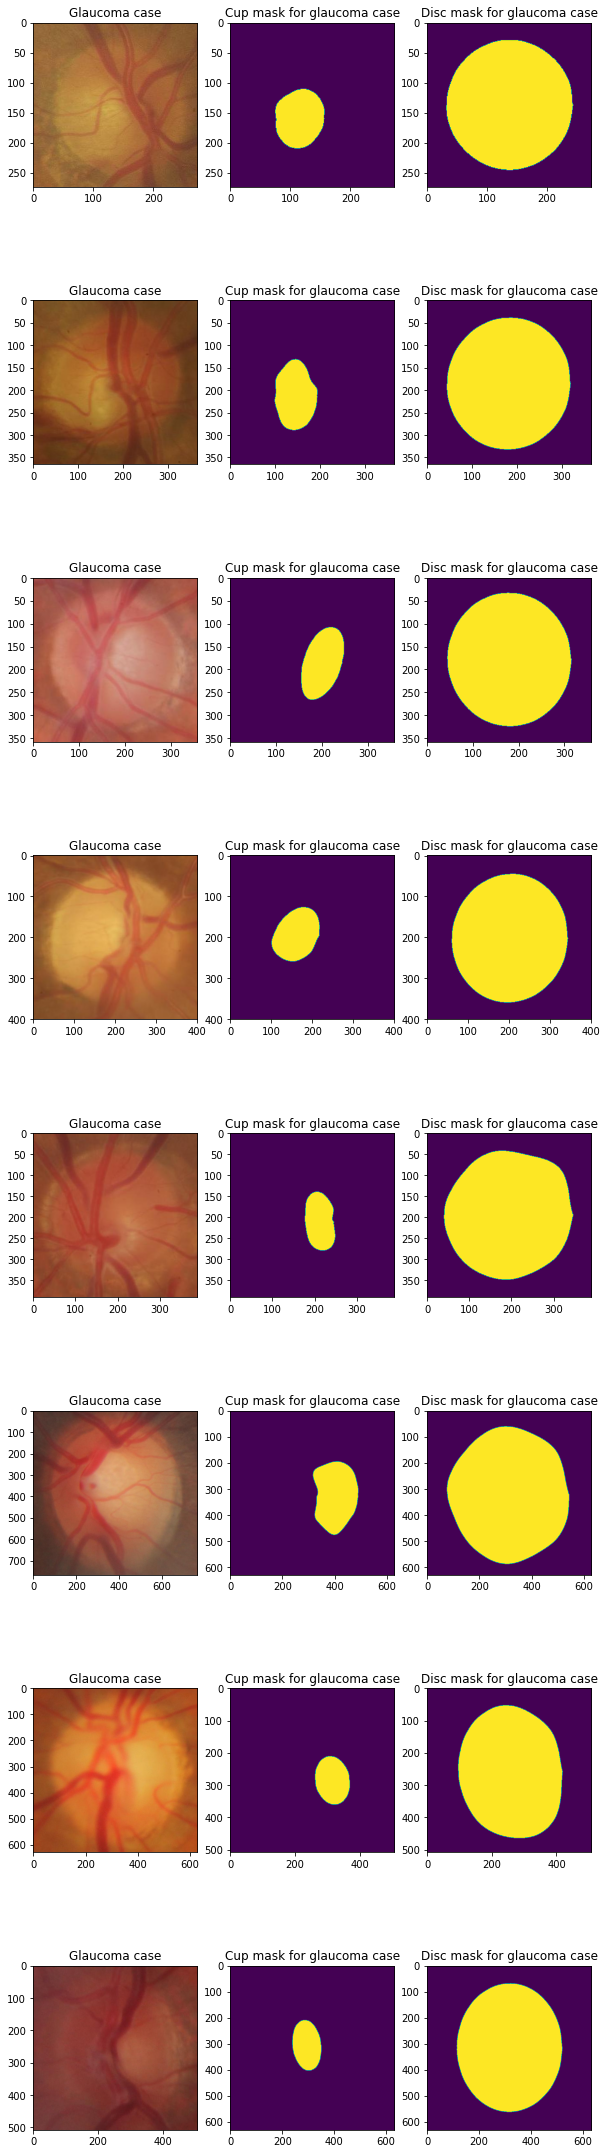

In [ ]:
#small 8 
index = 1
fig = plt.figure(figsize=(10, 40))
for i in range(8):  
    fig.add_subplot(8, 3, index)
    #fig.tight_layout()
    id = c_small_disc[i][0]
    id = int(id /2)
    plt.imshow(g_img[id])
    plt.imshow(g_img[g_id_should_be_normal[i]])
    plt.title("Glaucoma case")
    
    
    id_d = int(c_small_disc[i][0])
    id_c = int(id_d - 1)

    fig.add_subplot(8, 3, index+1)
    #fig.tight_layout()
    plt.imshow(g_mask[id_c])
    plt.title("Cup mask for glaucoma case")
    

    fig.add_subplot(8, 3, index+2)
    #fig.tight_layout()
    plt.imshow(g_mask[id_d])
    plt.title("Disc mask for glaucoma case")
    

    index = index + 3

##**Linear Model**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import  tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
I_rim_g = df_glaucoma_img['I_rim']
I_rim_n = df_normal_img['I_rim']
S_rim_g = df_glaucoma_img['S_rim']
S_rim_n = df_normal_img['S_rim']
T_rim_g = df_glaucoma_img['T_rim']
T_rim_n = df_normal_img['T_rim']
N_rim_g = df_glaucoma_img['N_rim']
N_rim_n = df_normal_img['N_rim']

In [ ]:
type(N_rim_g)

pandas.core.series.Series

In [ ]:
#No need to run, Just first time

g_feature_CDR = df_glaucoma_img['CDR'].tolist()
n_feature_CDR = df_normal_img['CDR'].tolist()

g_path = df_glaucoma_img['Path'].tolist()
n_path = df_normal_img['Path'].tolist()

g_cup_disc_area = df_glaucoma['NumberOfWhitePixels']
n_cup_disc_area = df_normal['NumberOfWhitePixels']


I_rim_g = df_glaucoma_img['I_rim'].tolist()
I_rim_n = df_normal_img['I_rim'].tolist()
S_rim_g = df_glaucoma_img['S_rim'].tolist()
S_rim_n = df_normal_img['S_rim'].tolist()
T_rim_g = df_glaucoma_img['T_rim'].tolist()
T_rim_n = df_normal_img['T_rim'].tolist()
N_rim_g = df_glaucoma_img['N_rim'].tolist()
N_rim_n = df_normal_img['N_rim'].tolist()

g_cup_area = []
n_cup_area = []
g_disc_area = []
n_disc_area = []
normal = []
glaucoma = []


for i in range(0,len(n_cup_disc_area),2):
  n_cup_area.append(n_cup_disc_area[i])
  n_disc_area.append(n_cup_disc_area[i+1])
  normal.append(1)  ## 1 means Normal

for i in range(0,len(g_cup_disc_area),2):
  g_cup_area.append(g_cup_disc_area[i])
  g_disc_area.append(g_cup_disc_area[i+1])
  glaucoma.append(0)  ## 0 means Glaucoma

Path = n_path + g_path
CDR = n_feature_CDR + g_feature_CDR
cup_area = n_cup_area + g_cup_area
disc_area = n_disc_area + g_disc_area
classify = normal + glaucoma
I_rim = I_rim_n + I_rim_g
S_rim = S_rim_n + S_rim_g
T_rim = T_rim_n + T_rim_g
N_rim = N_rim_n + N_rim_g

print(len(Path) ,len(CDR), len(cup_area), len(disc_area), len(classify), len(I_rim), len(S_rim), len(T_rim), len(N_rim))

import pandas as pd
 
# initialize data of lists.
data = {'Path' : Path,
        'CDR': CDR,
        'Cup_area': cup_area,
        'Disc_area': disc_area,
        'classify' : classify,
        'I_rim' : I_rim,
        'S_rim' : S_rim,
        'T_rim': T_rim,
        'N_rim' : N_rim}
 
# Create DataFrame
df = pd.DataFrame(data)
df = df.sample(frac = 1)
df.to_excel("/content/gdrive/MyDrive/Data/FullTabularData.xlsx") 

485 485 485 485 485 485 485 485 485


In [ ]:
data_linear = pd.read_excel ('/content/gdrive/MyDrive/Data/FullData.xlsx') 
df_linear = pd.DataFrame(data_linear)
df_linear.head()

ID                                              Path   CDR  Cup_area  \
0  127    /content/RIM-ONE_DL_images/normal/r2_Im052.png  0.34     20159   
1   95    /content/RIM-ONE_DL_images/normal/r2_Im011.png  0.19      1660   
2  425  /content/RIM-ONE_DL_images/glaucoma/r2_Im445.png  0.77    104683   
3  353  /content/RIM-ONE_DL_images/glaucoma/r2_Im317.png  0.64     29789   
4  123    /content/RIM-ONE_DL_images/normal/r2_Im044.png  0.36     22390   

   Disc_area  classify   I_rim   S_rim   T_rim   N_rim  
0     172447         0  147762  113352   94152  105666  
1      47627         0   38469   38451   31857   31647  
2     178229         1   43272   58002   67134   53697  
3      72746         1   29112   34398   32997   33807  
4     173915         0  134457  123678  109485   90780

In [ ]:
len(df_linear[df_linear['classify'] ==1])

172

In [ ]:
len(df_linear[df_linear['classify'] ==0])

313

In [ ]:
df_linear.describe()

ID         CDR       Cup_area      Disc_area    classify  \
count  485.000000  485.000000     485.000000     485.000000  485.000000   
mean   242.000000    0.465320   29220.127835  110414.280412    0.354639   
std    140.151704    0.183883   30560.393520   60931.422828    0.478898   
min      0.000000    0.070000     738.000000   34847.000000    0.000000   
25%    121.000000    0.330000    8477.000000   62741.000000    0.000000   
50%    242.000000    0.460000   19615.000000   84539.000000    0.000000   
75%    363.000000    0.600000   36863.000000  159891.000000    1.000000   
max    484.000000    0.930000  178113.000000  316400.000000    1.000000   

               I_rim          S_rim          T_rim          N_rim  
count     485.000000     485.000000     485.000000     485.000000  
mean    64922.542268   64936.175258   58680.420619   57595.651546  
std     41796.256958   38728.150721   35308.020034   35381.338185  
min      3483.000000    1707.000000    7404.000000    4713.000000  
25%     34803.000000   35688.000000   31662.000000   32187.000000  
50%     48798.000000   49851.000000   45018.000000   45390.000000  
75%     94620.000000   96048.000000   84663.000000   79146.000000  
max    216093.000000  194742.000000  187887.000000  177960.000000

In [ ]:
df_linear.isna().sum()

ID           0
Path         0
CDR          0
Cup_area     0
Disc_area    0
classify     0
I_rim        0
S_rim        0
T_rim        0
N_rim        0
dtype: int64

In [ ]:
df_linear.isnull().sum()

ID           0
Path         0
CDR          0
Cup_area     0
Disc_area    0
classify     0
I_rim        0
S_rim        0
T_rim        0
N_rim        0
dtype: int64

In [ ]:
X = df_linear[['CDR','Cup_area','Disc_area']].values#.reshape(-1, 1)
y = df_linear['classify'].values#.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


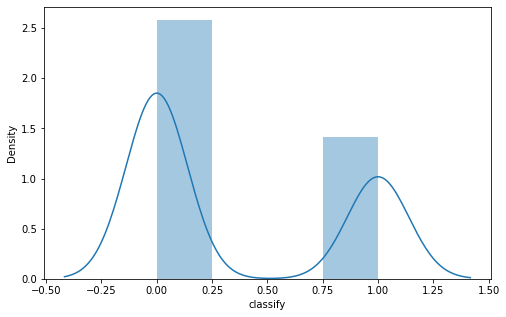

In [ ]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.distplot(df_linear['classify'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)
  
# Splitting the data into training and testing data
#regr = LogisticRegression 
  
#regr.fit(X_train, y_train)
#print(regr.score(X_test, y_test))

In [ ]:


print('Before Normalization: ')
print(f'Train: max {X_train.max(axis=0)}, min {X_train.min(axis=0)}')
print(f'Test: max {X_test.max(axis=0)}, min {X_test.min(axis=0)}')

#Calculate mean and std for the training data. 
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

# normalize train and test data
X_train_nrom = (X_train - train_mean) / train_std
X_test_nrom = (X_test - train_mean) / train_std

print('*' * 20)
print('After Normalization: ')
print(f'Train: max {X_train_nrom.max(axis=0)}, min {X_train_nrom.min(axis=0)}')
print(f'Test: max {X_test_nrom.max(axis=0)}, min {X_test_nrom.min(axis=0)}')



Before Normalization: 
Train: max [9.20000e-01 1.78113e+05 3.16400e+05], min [7.0000e-02 7.8800e+02 3.4847e+04]
Test: max [9.30000e-01 1.45300e+05 2.62168e+05], min [1.0000e-01 7.3800e+02 3.7943e+04]
********************
After Normalization: 
Train: max [2.43576229 4.82976731 3.27439702], min [-2.09905008 -0.92449396 -1.23690978]
Test: max [2.48911302 3.76497343 2.40544094], min [-1.93899788 -0.92611648 -1.18730276]


#**Logistic Regresion**

In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:


#regressor = LogisticRegression(solver='liblinear', max_iter=1000, random_state= 42)  # solver='liblinear' for one-versus-rest 
#regressor.fit(X_train, y_train)

regressor = LogisticRegression()

In [ ]:


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
# define search space
space = dict()
space['solver'] = [ 'liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(regressor, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.8554054054054057
Best Hyperparameters: {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
regressor = LogisticRegression(C= 10, penalty='l1', solver='liblinear')
regressor.fit(X_train, y_train)

#regressor = LogisticRegression(solver='liblinear', max_iter=1000, random_state= 42)  # solver='liblinear' for one-versus-rest 
#regressor.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [ ]:
from sklearn import metrics
y_pred_logreg = regressor.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_logreg))
print("Mean Absolute Error ", metrics.mean_absolute_error(y_train, y_pred_logreg))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_logreg})
df1 = df.head(10)
df1


Accuracy: 0.859504132231405
Mean Absolute Error  0.14049586776859505


Actual  Predicted
0       1          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          1
7       0          0
8       0          0
9       0          1

In [ ]:
y_pred_logreg = regressor.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Mean Absolute Error ",metrics.mean_absolute_error(y_test, y_pred_logreg))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg})
df1 = df.head(10)
df1

Accuracy: 0.8934426229508197
Mean Absolute Error  0.10655737704918032


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       1          1
5       1          1
6       0          0
7       1          1
8       1          1
9       1          1

Text(0.5, 257.44, 'Predicted label')

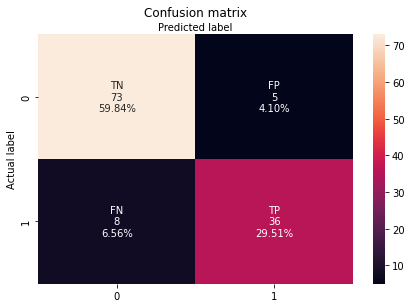

In [ ]:

cm = metrics.confusion_matrix(y_test, y_pred_logreg)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap , cmap="YlGnBu"
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(pd.DataFrame(cm), annot=labels,fmt='')#, cmap="YlGnBu")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label' )



In [ ]:
c = regressor.intercept_
c[0]

-8.226888071477001

In [ ]:
w = regressor.coef_[0]
w

array([ 1.44363196e+01,  1.45112052e-05, -1.95679882e-06])

Text(0.5, 1.0, 'Decision Boundary')

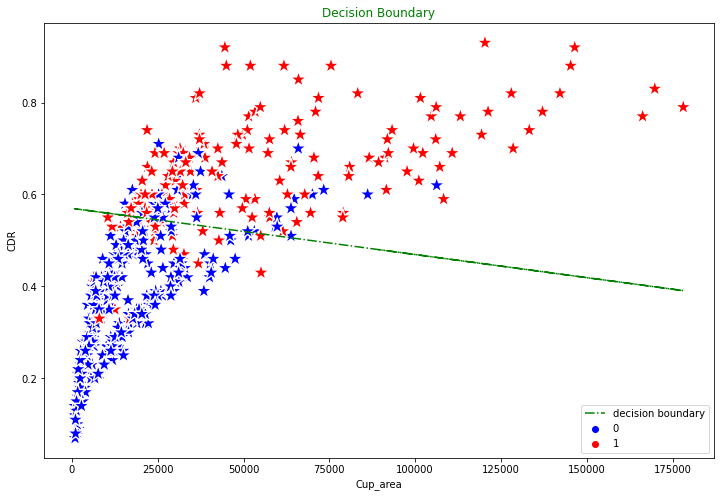

In [ ]:
'''
or 
g = sns.scatterplot(x= 'CDR',y = 'Cup_area',hue='classify',data = df_linear, marker="*")
dbound = -(w[0]*df_linear['CDR']+c[0])/w[1] 
plt.plot(df_linear['CDR'], dbound)

'''

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')    
g = sns.scatterplot(x= 'Cup_area',y = 'CDR',hue='classify',data = df_linear, marker="*", s=300,  palette=['blue','red'], legend='full')
dbound = -(w[1]*df_linear['Cup_area']+c[0])/w[0]
plt.plot(df_linear['Cup_area'], dbound, color = 'g',linestyle='-.', label= 'decision boundary')


plt.legend(loc='lower right')
plt.title("Decision Boundary", color = 'Green')



In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        78
           1       0.88      0.82      0.85        44

    accuracy                           0.89       122
   macro avg       0.89      0.88      0.88       122
weighted avg       0.89      0.89      0.89       122



#**Desicion Tree**

In [ ]:
clf =DecisionTreeClassifier()
#clf = clf.fit(X_train, y_train) # the result better without Normalization

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10), 'min_samples_leaf': np.arange(3,10)}
#use gridsearch to test all values
dtree_gscv = GridSearchCV(clf, param_grid, cv=cv)
#fit model to data
dtree_gscv.fit(X_train, y_train)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9])})

In [ ]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4}

In [ ]:
clf =DecisionTreeClassifier(criterion= 'entropy', max_depth = 3)#, min_samples_leaf=4)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred_clf = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_clf))
print("Mean Absolute Error ", metrics.mean_absolute_error(y_train, y_pred_clf))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_clf})
df1 = df.head(10)
df1


Accuracy: 0.8760330578512396
Mean Absolute Error  0.12396694214876033


Actual  Predicted
0       1          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          1
7       0          0
8       0          0
9       0          1

In [ ]:
clf.score(X_train,y_pred_clf)

1.0

In [ ]:
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, y_pred_clf))

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
df1.head(10)


Accuracy: 0.8934426229508197
Mean Absolute Error  0.10655737704918032


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       1          1
5       1          1
6       0          0
7       1          1
8       1          1
9       1          1

Text(0.5, 257.44, 'Predicted label')

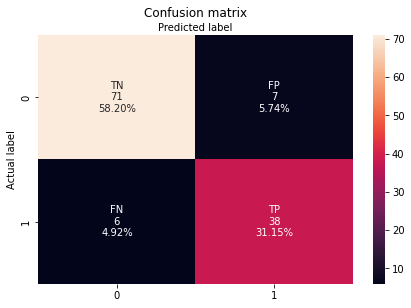

In [ ]:

cm = metrics.confusion_matrix(y_test, y_pred_clf)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(pd.DataFrame(cm), annot=labels,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.84      0.86      0.85        44

    accuracy                           0.89       122
   macro avg       0.88      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122



In [ ]:
clf.get_depth()

3

In [ ]:
clf.get_n_leaves()

7

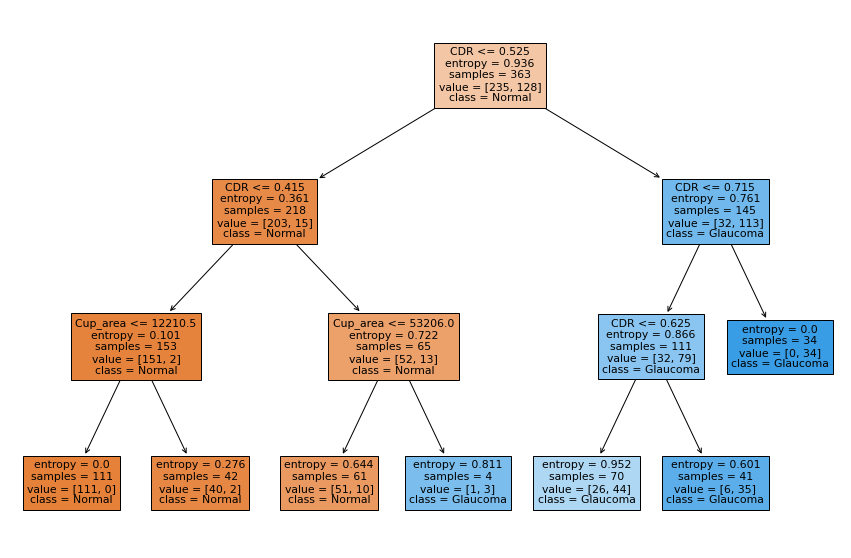

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names= ['CDR','Cup_area','Disc_area'],  
                   class_names = ['Normal','Glaucoma'],
                   
                   filled=True)

In [ ]:
import graphviz
import pydotplus
import collections
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= ['CDR','Cup_area','Disc_area'],  
                                class_names = ['Normal','Glaucoma'],
                                filled=True,
                                rounded=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('purple', 'pink')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree1.png')
graph

In [ ]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

findfont: Font family ['TimesNewRoman'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['TimesNewRoman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TimesNewRoman'] not found. Falling back t

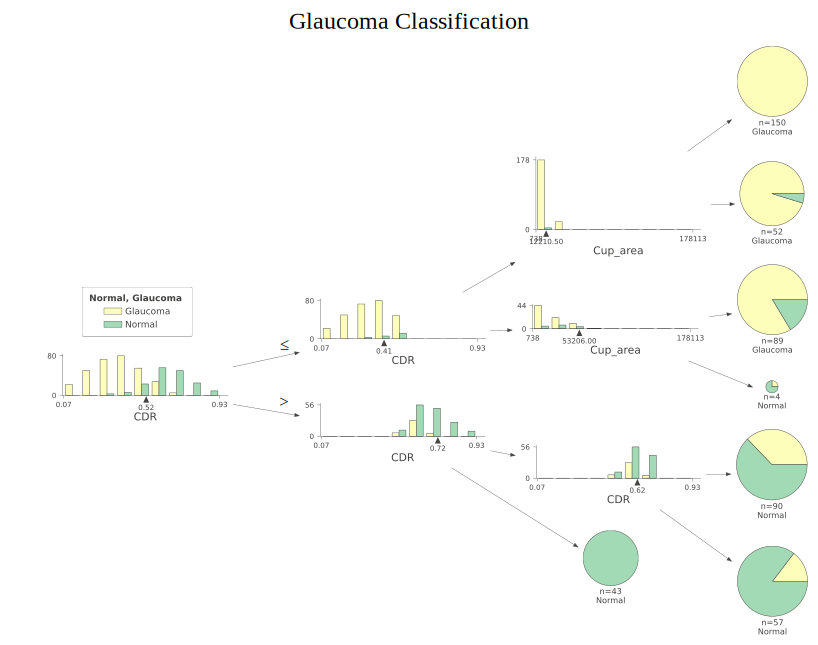

In [ ]:

from dtreeviz.trees import dtreeviz # remember to load the package


viz = dtreeviz(clf, X, y,
               target_name="Normal, Glaucoma ",
               feature_names= ['CDR','Cup_area','Disc_area'],  
               class_names = ['Glaucoma','Normal'],
               histtype='bar', 
               orientation ='LR',
               title="Glaucoma Classification",
               fontname="TimesNewRoman",
               title_fontsize=20,
               colors = {"title":"Black"},
               scale = 1.2
               )

viz


In [ ]:
clf.feature_importances_

array([0.95785578, 0.04214422, 0.        ])

<BarContainer object of 3 artists>

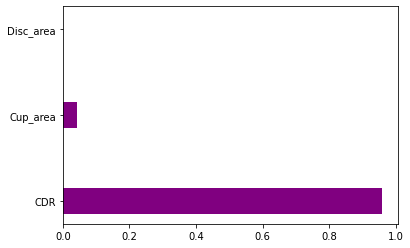

In [ ]:
plt.barh(['CDR','Cup_area','Disc_area'], clf.feature_importances_, color = 'purple', height = 0.3)

#**Random Forest**

In [ ]:
#rfc = RandomForestClassifier(n_estimators = 500, max_depth= 5, random_state = 42)
#rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid = { 
    'n_estimators': [10, 20, 30, 40,50,60], #np.arange(10, 100), #,
    #'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : np.arange(3, 15),
     'criterion':['gini','entropy'],
     'min_samples_leaf': np.arange(3,15)
}

rfc = RandomForestClassifier()
rdtree_gscv = GridSearchCV(rfc, param_grid, cv=cv)
#fit model to data
rdtree_gscv.fit(X_train, y_train)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': [10, 20, 30, 40, 50, 60]})

In [ ]:
rdtree_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'n_estimators': 40}

In [ ]:
rfc = RandomForestClassifier(criterion = 'gini',n_estimators = 40, max_depth= 5)#, min_samples_leaf= 3)
rfc.fit(X_train, y_train)
# max_features='sqrt'RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=30)

RandomForestClassifier(max_depth=5, n_estimators=40)

In [ ]:
# Use the forest's predict method on the train data
y_pred_rfc = rfc.predict(X_train)# Calculate the absolute errors
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rfc))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train, y_pred_rfc))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_rfc})
df1 = df.head(10)
df1


Accuracy: 0.8980716253443526
Mean Absolute Error: 0.10192837465564739


Actual  Predicted
0       1          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          1
7       0          0
8       0          0
9       0          1

In [ ]:
# Use the forest's predict method on the test data
y_pred_rfc = rfc.predict(X_test)# Calculate the absolute errors
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfc))
#print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_rfc), 2))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfc})
df1 = df.head(10)
df1  

Accuracy: 0.8852459016393442
Mean Absolute Error: 0.11475409836065574


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       1          1
5       1          0
6       0          0
7       1          1
8       1          1
9       1          1

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        78
           1       0.84      0.84      0.84        44

    accuracy                           0.89       122
   macro avg       0.88      0.88      0.88       122
weighted avg       0.89      0.89      0.89       122



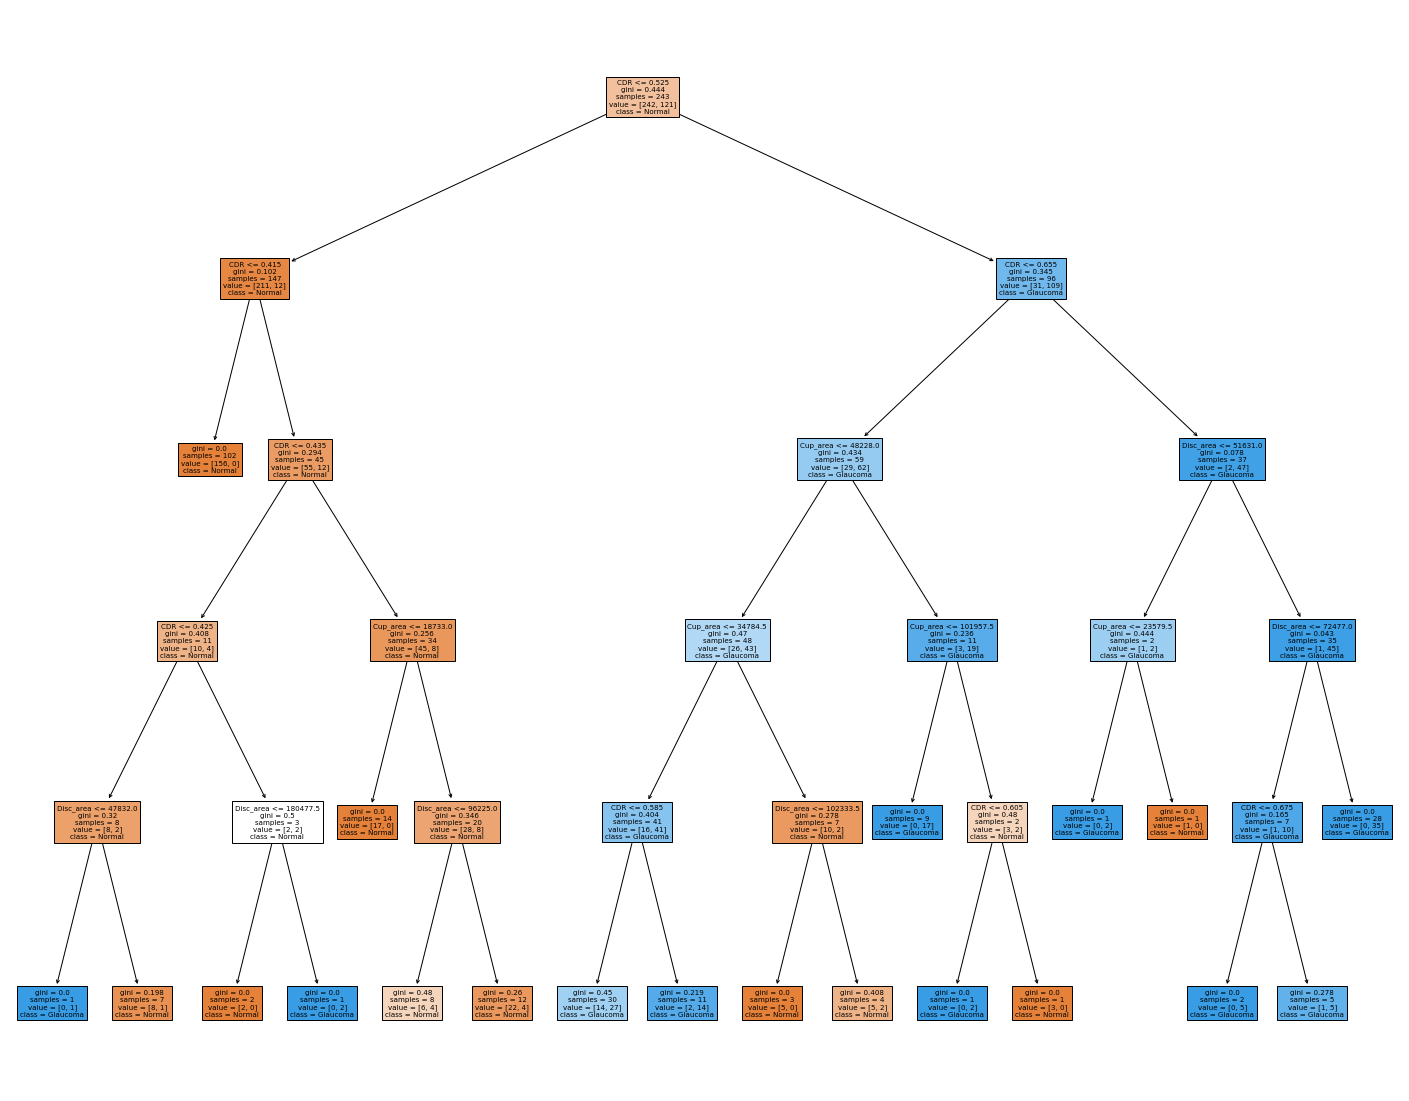

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[10],
               feature_names= ['CDR','Cup_area','Disc_area'],  
               class_names = ['Normal','Glaucoma'],
               filled = True,
               );
fig.savefig('rf_individualtree.png')

In [ ]:
import graphviz
import pydotplus
import collections
# DOT data
dot_data = tree.export_graphviz(rfc.estimators_[10], out_file=None, 
                                feature_names= ['CDR','Cup_area','Disc_area'],  
                                class_names = ['Normal','Glaucoma'],
                                filled=True,
                                rounded=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('purple', 'pink')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree2.png')
graph

In [ ]:
gr

In [ ]:
graph.render('Random Forest Tree10')

'Random Forest Tree10.png'

In [ ]:
impo_feature = rfc.estimators_[10].feature_importances_
impo_feature

array([0.84613471, 0.1089452 , 0.04492009])

<BarContainer object of 3 artists>

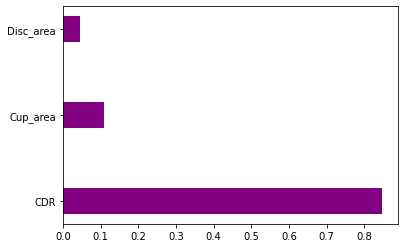

In [ ]:

plt.barh(['CDR','Cup_area','Disc_area'], impo_feature, color = 'purple', height = 0.3)

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 6.9 MB/s 


In [ ]:
import shap

exp = shap.TreeExplainer(rfc)
sv = exp.shap_values(X_test)

In [ ]:
column_names= df_linear[['CDR','Cup_area','Disc_area']].columns
column_names

Index(['CDR', 'Cup_area', 'Disc_area'], dtype='object')

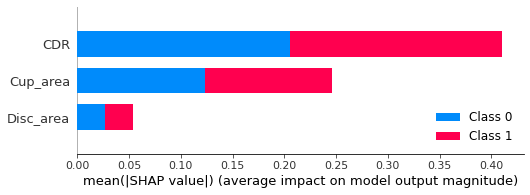

In [ ]:
shap.summary_plot(sv, column_names)

Text(0.5, 257.44, 'Predicted label')

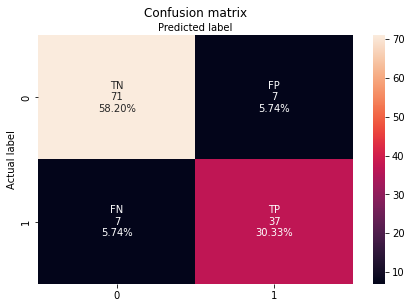

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_rfc)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(pd.DataFrame(cm), annot=labels ,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**ISNT**  JUST FIRST TIME

In [ ]:

# calculate Inferior part of rim (buttom)
I_rim_g = []
for i in range(0,len(g_mask),2):
    rim = g_mask[i+1]-g_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[width, height],[0, height],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    I_rim_g.append((np.sum(dst == 255)))

file_name = r"/content/gdrive/MyDrive/Data/2/glaucoma.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['I_rim'] = I_rim_g
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/glaucoma.xlsx") 

In [ ]:
len(I_rim_g)

172

In [ ]:
I_rim_n = []
for i in range(0,len(n_mask),2):
    rim = n_mask[i+1]-n_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[width, height],[0, height],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    I_rim_n.append((np.sum(dst == 255)))
file_name = r"/content/gdrive/MyDrive/Data/2/normal.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['I_rim'] = I_rim_n
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/normal.xlsx") 

In [ ]:
len(I_rim_n)

313

In [ ]:
# calculate Superior part of rim (up)
S_rim_g = []
for i in range(0,len(g_mask),2):
    rim = g_mask[i+1]-g_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[width, 0],[0,0],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    S_rim_g.append((np.sum(dst == 255)))
    
file_name = r"/content/gdrive/MyDrive/Data/2/glaucoma.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['S_rim'] = S_rim_g
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/glaucoma.xlsx") 

In [ ]:
S_rim_n = []
for i in range(0,len(n_mask),2):
    rim = n_mask[i+1]-n_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[width, 0],[0,0],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    S_rim_n.append((np.sum(dst == 255)))
file_name = r"/content/gdrive/MyDrive/Data/2/normal.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['S_rim'] = S_rim_n
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/normal.xlsx") 

In [ ]:
len(S_rim_n)

313

In [ ]:
# calculate Nasal part of rim (right)
N_rim_g = []
for i in range(0,len(g_mask),2):
    rim = g_mask[i+1]-g_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[width, 0],[width, height],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    N_rim_g.append((np.sum(dst == 255)))
file_name = r"/content/gdrive/MyDrive/Data/2/glaucoma.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['N_rim'] = N_rim_g
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/glaucoma.xlsx") 

In [ ]:

N_rim_n = []
for i in range(0,len(n_mask),2):
    rim = n_mask[i+1]-n_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[width, 0],[width, height],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    N_rim_n.append((np.sum(dst == 255)))
file_name = r"/content/gdrive/MyDrive/Data/2/normal.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['N_rim'] = N_rim_n
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/normal.xlsx") 

In [ ]:
# calculate Temporal part of rim (left)
T_rim_g = []
for i in range(0,len(g_mask),2):
    rim = g_mask[i+1]-g_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[0, 0],[0, height],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    T_rim_g.append((np.sum(dst == 255)))

file_name = r"/content/gdrive/MyDrive/Data/2/glaucoma.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['T_rim'] = T_rim_g
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/glaucoma.xlsx") 

In [ ]:
T_rim_n = []
for i in range(0,len(n_mask),2):
    rim = n_mask[i+1]-n_mask[i]
    height = rim.shape[0]
    width = rim.shape[1]
    cen1 = int(height/2)
    cen2 = int(width/2)   

    pts = np.array([[cen1,cen2],[0, 0],[0, height],[cen1,cen2]])
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = rim[y:y+h, x:x+w].copy()


    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    ## Inferior part of rim
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    T_rim_n.append((np.sum(dst == 255)))
file_name = r"/content/gdrive/MyDrive/Data/2/normal.xlsx"
df = pd.read_excel(file_name) #Read Excel file as a DataFrame

df['T_rim'] = T_rim_n
#Display top 5 rows to check if everything looks good
df.head(5)

#To save it back as Excel
df.to_excel("/content/gdrive/MyDrive/Data/2/normal.xlsx") 

#**Example**

In [ ]:

rim = g_mask[1]-g_mask[0]
height = rim.shape[0]
width = rim.shape[1]

height

547

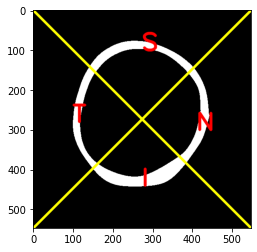

Text(0.5, 1.0, 'Nasal Part (Right Part) ')

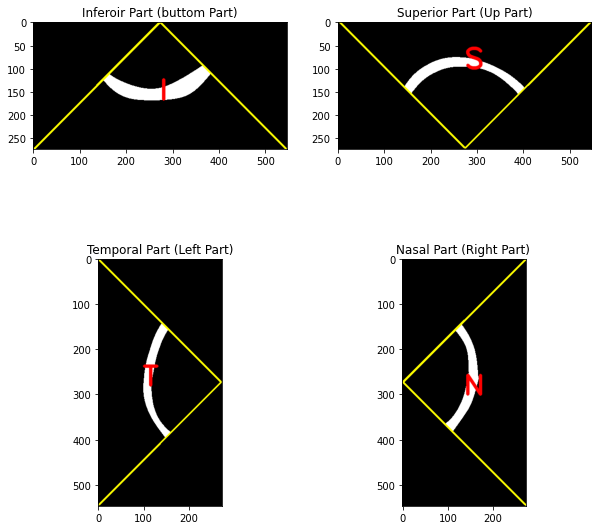

In [ ]:
#Example


rim = g_mask[1]-g_mask[0]
height = rim.shape[0]
width = rim.shape[1]
cen1 = int(height/2) ##y
cen2 = int(width/2) ##x

cv2.line(rim, (0, 0), (width, height), (255, 255, 0), 5)
cv2.line(rim, (width, 0), (0, height), (255, 255, 0), 5)


org = (cen2, 440)
  
# fontScale
fontScale = 2
font = cv2.FONT_HERSHEY_SIMPLEX   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 5
   
# Using cv2.putText() method
cv2.putText(rim, 'I', org, font, fontScale, color, thickness, cv2.LINE_AA)
####
org = (410, 300)
  
fontScale = 2
font = cv2.FONT_HERSHEY_SIMPLEX   
color = (255, 0, 0)
thickness = 5  
cv2.putText(rim, 'N', org, font, fontScale, color, thickness, cv2.LINE_AA)

###
org = (100, 280)
  
fontScale = 2
font = cv2.FONT_HERSHEY_SIMPLEX   
color = (255, 0, 0)
thickness = 5  
cv2.putText(rim, 'T', org, font, fontScale, color, thickness, cv2.LINE_AA)

###
org = (cen1, 100)
  
fontScale = 2
font = cv2.FONT_HERSHEY_SIMPLEX   
color = (255, 0, 0)
thickness = 5  
cv2.putText(rim, 'S', org, font, fontScale, color, thickness, cv2.LINE_AA)

###

plt.imshow(rim)
plt.show()
 
fig =  plt.figure(figsize=(10,10))
#I
pts_I = np.array([[cen1,cen2],[width, height],[0, height],[cen1,cen2]])
rect = cv2.boundingRect(pts_I)
x,y,w,h = rect
croped = rim[y:y+h, x:x+w].copy()



pts_I = pts_I - pts_I.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts_I], -1, (255, 255, 255), -1, cv2.LINE_AA)

dst = cv2.bitwise_and(croped, croped, mask=mask)


fig.add_subplot(2,2,1)
plt.imshow(dst)
plt.title("Inferoir Part (buttom Part)")
#plt.show()  
#S
pts_S = np.array([[cen1,cen2],[width, 0],[0,0],[cen1,cen2]])
rect = cv2.boundingRect(pts_S)
x,y,w,h = rect
croped = rim[y:y+h, x:x+w].copy()


pts_S = pts_S - pts_S.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts_S], -1, (255, 255, 255), -1, cv2.LINE_AA)

dst = cv2.bitwise_and(croped, croped, mask=mask)
fig.add_subplot(2,2,2)
plt.imshow(dst)
plt.title("Superior Part (Up Part)")
#plt.show()   
#T 
pts_T = np.array([[cen1,cen2],[0, 0],[0, height],[cen1,cen2]])
rect = cv2.boundingRect(pts_T)
x,y,w,h = rect
croped = rim[y:y+h, x:x+w].copy()



pts_T = pts_T - pts_T.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts_T], -1, (255, 255, 255), -1, cv2.LINE_AA)

dst = cv2.bitwise_and(croped, croped, mask=mask)
fig.add_subplot(2,2,3)
plt.imshow(dst)
plt.title("Temporal Part (Left Part)")
#plt.show()  
#N       
pts_N = np.array([[cen1,cen2],[width, 0],[width, height],[cen1,cen2]])
rect = cv2.boundingRect(pts_N)
x,y,w,h = rect
croped = rim[y:y+h, x:x+w].copy()


pts_N = pts_N - pts_N.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts_N], -1, (255, 255, 255), -1, cv2.LINE_AA)
dst = cv2.bitwise_and(croped, croped, mask=mask)
fig.add_subplot(2,2,4)
plt.imshow(dst)
plt.title("Nasal Part (Right Part) ")
#plt.show() 
  


## Inferior part of rim




#**Check ISNT RULE**

In [ ]:
I_rim_g = df_glaucoma_img['I_rim']
S_rim_g = df_glaucoma_img['S_rim']
T_rim_g = df_glaucoma_img['T_rim']
N_rim_g = df_glaucoma_img['N_rim']

res_equation = []
for i in range(len(I_rim_g)):
  if I_rim_g[i] > T_rim_g[i]:
    res_equation.append(0)
  else:
    res_equation.append(1)

In [ ]:
len(res_equation)

172

In [ ]:
np.sum(res_equation) ## here sum should be greater as much as possible

111

In [ ]:
I_rim_n = df_normal_img['I_rim']
S_rim_n = df_normal_img['S_rim']
T_rim_n = df_normal_img['T_rim']
N_rim_n = df_normal_img['N_rim']

res_equation = []
for i in range(len(I_rim_n)):
  if I_rim_n[i] > T_rim_n[i]:
    res_equation.append(0)
  else:
    res_equation.append(1)


In [ ]:
len(res_equation)

313

In [ ]:
np.sum(res_equation) ## here should the sum smaller as much as possible

57

#**Models With Inferoir Rim**

Regression Model

In [ ]:
X_train.shape

(363, 4)

In [ ]:
Z = df_linear[['CDR','Cup_area','Disc_area','I_rim']].values#.reshape(-1, 1)
P = df_linear['classify'].values#.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Z, P, test_size = 0.25, random_state= 0)

In [ ]:
regressor = LogisticRegression()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
# define search space
space = dict()
space['solver'] = [ 'liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(regressor, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8793543543543544
Best Hyperparameters: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
regressor = LogisticRegression(C= 1e-05, penalty='l2', solver='liblinear')
regressor.fit(X_train, y_train)

LogisticRegression(C=1e-05, solver='liblinear')

In [ ]:
from sklearn import metrics
y_pred_logreg = regressor.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_logreg))
print("Mean Absolute Error ", metrics.mean_absolute_error(y_train, y_pred_logreg))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_logreg})
df1 = df.head(10)
df1


Accuracy: 0.8787878787878788
Mean Absolute Error  0.12121212121212122


Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0
5       0          0
6       1          1
7       0          1
8       0          0
9       1          1

In [ ]:
y_pred_logreg = regressor.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Mean Absolute Error ",metrics.mean_absolute_error(y_test, y_pred_logreg))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg})
df1 = df.head(10)
df1

Accuracy: 0.9180327868852459
Mean Absolute Error  0.08196721311475409


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       1          1
9       0          0

Text(0.5, 257.44, 'Predicted label')

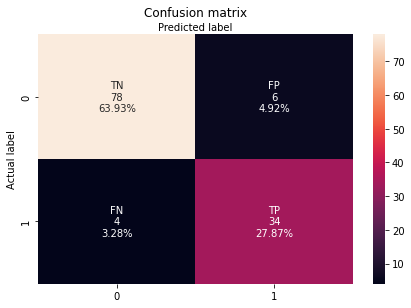

In [ ]:

cm = metrics.confusion_matrix(y_test, y_pred_logreg)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(pd.DataFrame(cm), annot=labels ,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
c = regressor.intercept_
c[0]

-2.6009361203809075e-08

In [ ]:
w = regressor.coef_[0]
w

array([-6.93976538e-09,  9.93408873e-05,  3.76924866e-06, -6.18871395e-05])

Text(0.5, 1.0, 'Decision Boundary')

<Figure size 864x576 with 0 Axes>

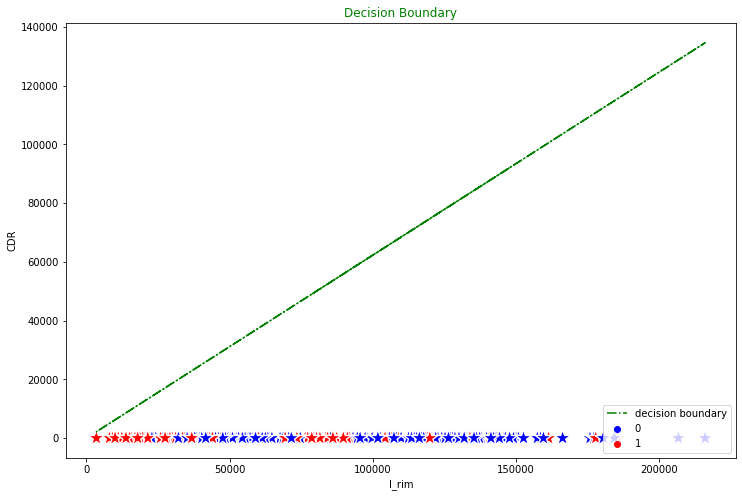

In [ ]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k') 
'''   
g = sns.scatterplot(x= 'I_rim',y = 'CDR',hue='classify',data = df_linear, marker="*", s=300,  palette=['blue','red'], legend='full')
dbound = -(w[3]*df_linear['I_rim']+c[0])/w[0]
plt.plot(df_linear['I_rim'], dbound, color = 'g',linestyle='-.', label= 'decision boundary')
plt.legend(loc='lower right')
plt.title("Decision Boundary", color = 'Green')

['CDR','Cup_area','Disc_area','I_rim']]
'''

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')    
g = sns.scatterplot(x= 'I_rim',y = 'CDR',hue='classify',data = df_linear, marker="*", s=300,  palette=['blue','red'], legend='full')
dbound = -(w[3]*df_linear['I_rim']+c[0])/(w[1])
plt.plot(df_linear['I_rim'], dbound, color = 'g',linestyle='-.', label= 'decision boundary')


plt.legend(loc='lower right')
plt.title("Decision Boundary", color = 'Green')

In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        84
           1       0.85      0.89      0.87        38

    accuracy                           0.92       122
   macro avg       0.90      0.91      0.91       122
weighted avg       0.92      0.92      0.92       122



Decision Tree

In [ ]:
clf =DecisionTreeClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf': np.arange(3,20)}
#use gridsearch to test all values
dtree_gscv = GridSearchCV(clf, param_grid, cv=cv)
#fit model to data
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [ ]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 18}

In [ ]:
clf =DecisionTreeClassifier(criterion= 'entropy', max_depth = 6)#,min_samples_leaf= 18)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred_clf = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_clf))
print("Mean Absolute Error ", metrics.mean_absolute_error(y_train, y_pred_clf))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_clf})
df1 = df.head(10)
df1

Accuracy: 0.928374655647383
Mean Absolute Error  0.07162534435261708


Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0
5       0          0
6       1          1
7       0          0
8       0          0
9       1          1

In [ ]:
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, y_pred_clf))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
df1 = df.head(10)
df1

Accuracy: 0.8852459016393442
Mean Absolute Error  0.11475409836065574


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       1          1
9       0          0

Text(0.5, 257.44, 'Predicted label')

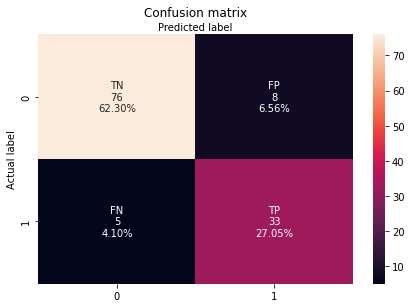

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_clf)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(pd.DataFrame(cm), annot=labels ,fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
clf.feature_importances_

array([0.72708522, 0.06161656, 0.11362401, 0.09767422])

<BarContainer object of 4 artists>

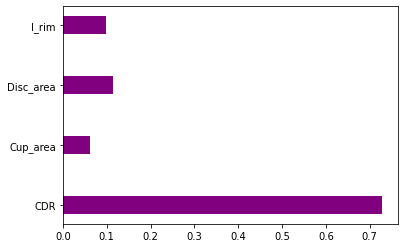

In [ ]:
plt.barh(['CDR','Cup_area','Disc_area','I_rim'], clf.feature_importances_, color = 'purple', height = 0.3)

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        84
           1       0.88      0.74      0.80        38

    accuracy                           0.89       122
   macro avg       0.88      0.84      0.86       122
weighted avg       0.88      0.89      0.88       122



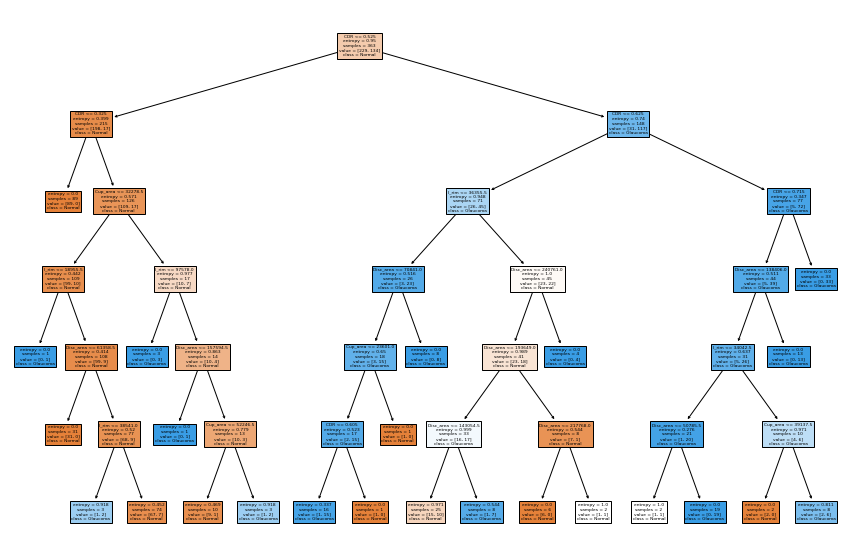

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names= ['CDR','Cup_area','Disc_area','I_rim'],  
                   class_names = ['Normal','Glaucoma'],
                   filled=True)

In [ ]:
import graphviz
import pydotplus
import collections
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= ['CDR','Cup_area','Disc_area','I_rim'],  
                                class_names = ['Normal','Glaucoma'],
                                filled=True,
                                rounded=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('purple', 'pink')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree3.png')
graph

Random Forest

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid = { 
     'n_estimators': [5, 10, 20, 30, 40 ], #np.arange(10, 100), #,
     'criterion':['gini','entropy'],
     #'min_samples_leaf': np.arange(3,10),
     'max_depth' : np.arange(3, 12)
}

rfc = RandomForestClassifier()
rdtree_gscv = GridSearchCV(rfc, param_grid, cv=cv)
#fit model to data
rdtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': [5, 10, 20, 30, 40]})

In [ ]:
rdtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 40}

In [ ]:
rfc = RandomForestClassifier(criterion= 'entropy',n_estimators = 40, max_depth= 10)#,min_samples_leaf= 3 )
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=40)

In [ ]:
# Use the forest's predict method on the train data
y_pred_rfc = rfc.predict(X_train)# Calculate the absolute errors
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rfc))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train, y_pred_rfc))

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_rfc})
df1 = df.head(10)
df1


Accuracy: 0.9944903581267218
Mean Absolute Error: 0.005509641873278237


Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0
5       0          0
6       1          1
7       0          0
8       0          0
9       1          1

In [ ]:
# Use the forest's predict method on the test data
y_pred_rfc = rfc.predict(X_test)# Calculate the absolute errors
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfc))
#print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_rfc), 2))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfc})
df1 = df.head(10)
df1

Accuracy: 0.8852459016393442
Mean Absolute Error: 0.11475409836065574


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       1          1
9       0          0

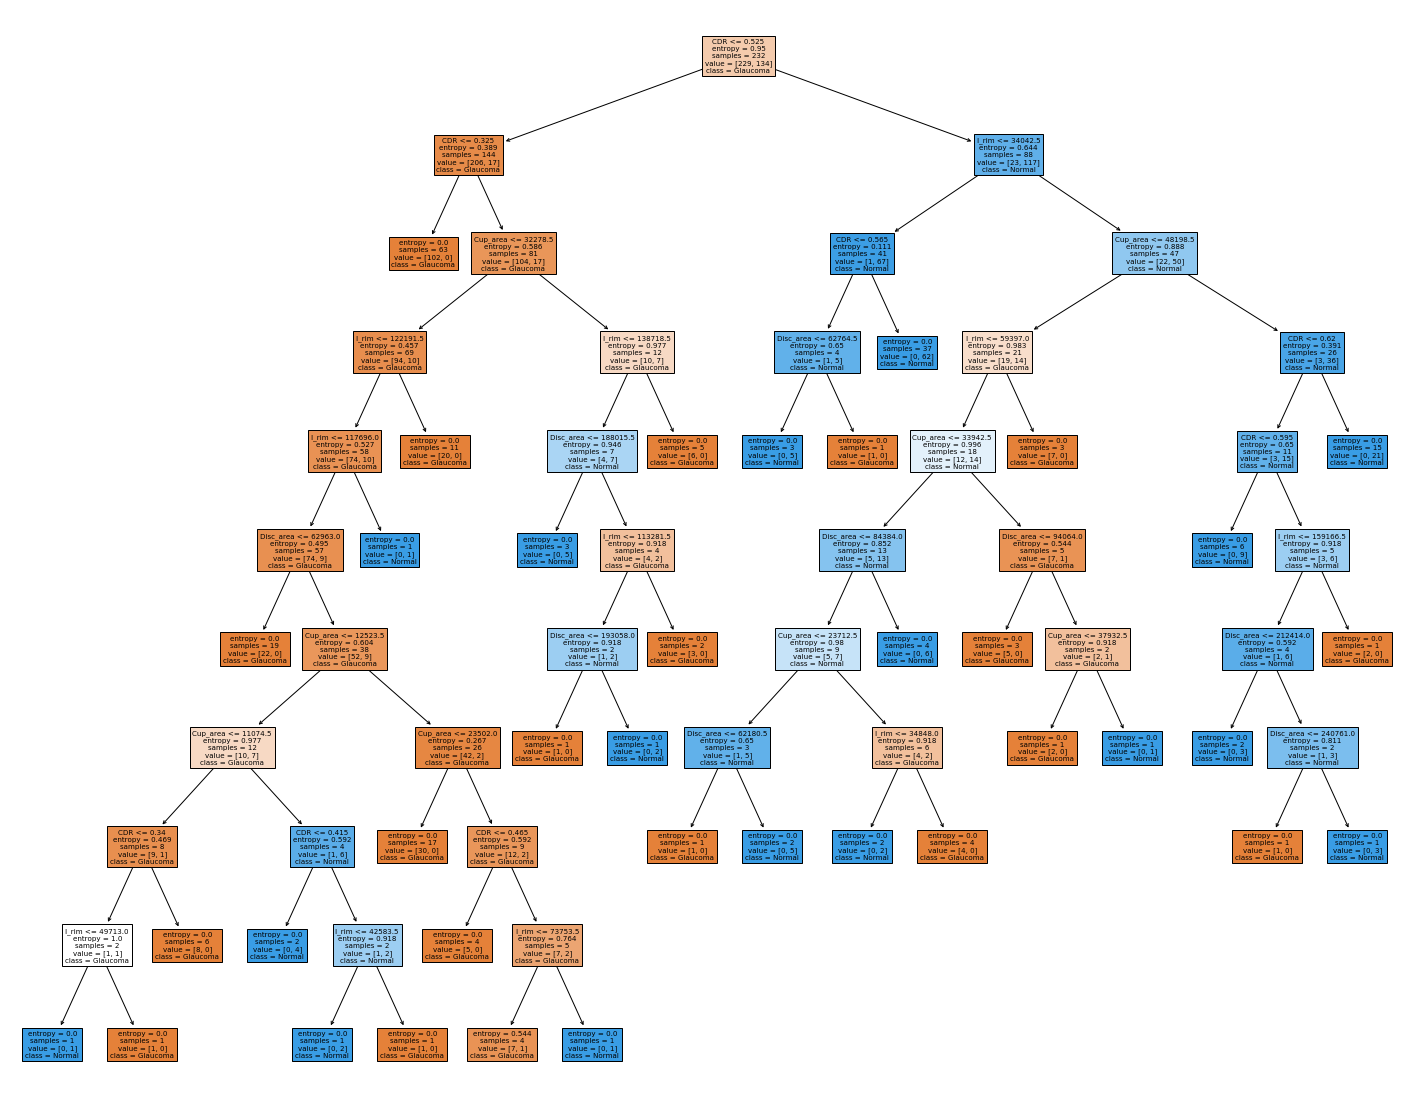

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[0],
               feature_names= ['CDR','Cup_area','Disc_area','I_rim'],  
               class_names = ['Glaucoma','Normal'],
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
impo_feature = rfc.estimators_[0].feature_importances_
impo_feature

array([0.58699537, 0.15850278, 0.08529779, 0.16920406])

<BarContainer object of 4 artists>

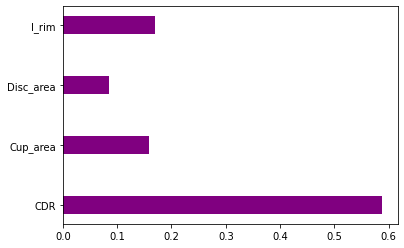

In [ ]:

plt.barh(['CDR','Cup_area','Disc_area', 'I_rim'], impo_feature, color = 'purple', height = 0.3)

Text(0.5, 257.44, 'Predicted label')

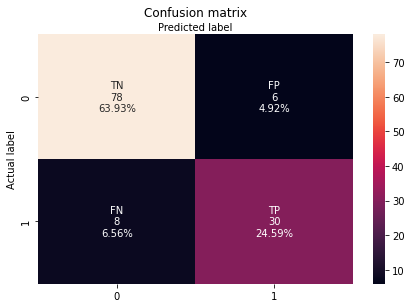

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_rfc)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(pd.DataFrame(cm), annot=labels, fmt='')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import graphviz
import pydotplus
import collections
# DOT data
dot_data = tree.export_graphviz(rfc.estimators_[6], out_file=None, 
                                feature_names= ['CDR','Cup_area','Disc_area','I_rim'],  
                                class_names = ['Normal','Glaucoma'],
                                filled=True,
                                rounded=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('purple', 'pink')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree4.png')
graph

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        84
           1       0.83      0.79      0.81        38

    accuracy                           0.89       122
   macro avg       0.87      0.86      0.86       122
weighted avg       0.88      0.89      0.88       122



#**Image Processing**

6523.0
422.0


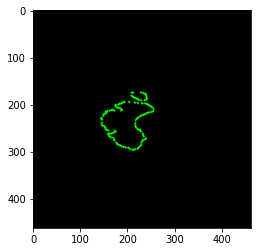

In [ ]:
im = cv2.imread('/content/gdrive/MyDrive/Data/RIM-ONE_DL_images/normal/r1_Im001.png')#'/content/gdrive/MyDrive/Data/RIM-ONE_DL_images/glaucoma/r1_Im069.png')
#image= cv2.add(im,np.array([-50.0]))
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gauss = cv2.GaussianBlur(imgray, (5, 5), 0)

ret, thresh = cv2.threshold(im_gauss, 127, 255, 0)
# get contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

canvas = np.zeros_like(im)



contours_area = []
# calculate area and filter into new array
for con in contours:
    area = cv2.contourArea(con)
    print(area)
    if  area < 1000000:
        contours_area.append(con)
        #epsilon = 0.1*cv2.arcLength(con,True)
        #approx = cv2.approxPolyDP(con,epsilon,True)
        
        #hull = cv2.convexHull(con)
     
        #cv2.drawContours(im, con, -1, (0, 255, 0), 3)
        cv2.drawContours(canvas , con, -1, (0, 255, 0), 3)
        #cv2.drawContours(canvas , [approx],-1, (0, 255, 0), 3)
        #cv2.drawContours(canvas, hull, -1, (0, 0, 255), 6)
   
#plt.figure()
#plt.imshow(im)
plt.imshow(canvas)

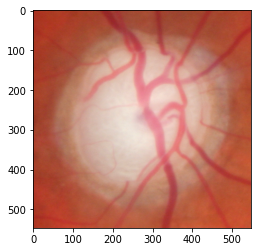

In [ ]:
m = plt.imread('/content/gdrive/MyDrive/Data/RIM-ONE_DL_images/glaucoma/r1_Im069.png')
plt.imshow(m)

0.0


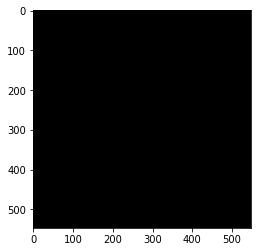

In [ ]:
contours_cirles = []
canvas = np.zeros_like(im)
# check if contour is of circular shape
for con in contours_area:
    perimeter = cv2.arcLength(con, True)
    print(perimeter)
    area = cv2.contourArea(con)
    if perimeter == 0:
        break
    circularity = 4*math.pi*(area/(perimeter*perimeter))
    print(circularity)
    if 0.7 < circularity < 1.2:
        contours_cirles.append(con)
        cv2.drawContours(canvas , contours, -1, (0, 255, 0), 1)
plt.imshow(canvas)

#**Neural Network**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
datasetUrl ='/content/gdrive/MyDrive/Data/output1'
target_size = (224,224)


batch_size = 2

num_classes = 2 
#groups = ['0', '1']

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Data/output1/train',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels        


#validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Data/output1/val', 
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels 


test_datagen = ImageDataGenerator(rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Data/output1/test', 
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels 

Found 339 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
from numpy.random import seed
seed(42)
tf.random.set_seed(42)

**SGD Optimizer**

In [ ]:
#Instantiate a base model and load pre-trained weights into it.
#Freeze all layers in the base model by setting trainable = False.
#Create a new model on top of the output of one (or several) layers from the base model.
#Train your new model on your new dataset


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer= SGD(learning_rate=0.001, momentum=0.9),loss = tf.keras.losses.BinaryCrossentropy() ,metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator, 
        epochs=50,
        validation_data=validation_generator)
        #callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/50
170/170 [==============================] - 82s 395ms/step - loss: 0.6713 - accuracy: 0.6224 - val_loss: 0.5665 - val_accuracy: 0.6667
Epoch 2/50
170/170 [==============================] - 6s 38ms/step - loss: 0.5845 - accuracy: 0.6844 - val_loss: 0.4986 - val_accuracy: 0.7292
Epoch 3/50
170/170 [==============================] - 6s 38ms/step - loss: 0.5539 - accuracy: 0.7198 - val_loss: 0.4719 - val_accuracy: 0.7292
Epoch 4/50
170/170 [==============================] - 7s 41ms/step - loss: 0.4774 - accuracy: 0.7935 - val_loss: 0.4591 - val_accuracy: 0.7500
Epoch 5/50
170/170 [==============================] - 7s 39ms/step - loss: 0.4895 - accuracy: 0.7847 - val_loss: 0.4491 - val_accuracy: 0.7917
Epoch 6/50
170/170 [==============================] - 7s 39ms/step - loss: 0.4552 - accuracy: 0.7935 - val_loss: 0.4060 - val_accuracy: 0.8333
Epoch 7/50
170/170 [==============================] - 7s 38ms/step - loss: 0.4344 - accuracy: 0.8112 - val_loss: 0.4048 - val_accuracy: 0.83

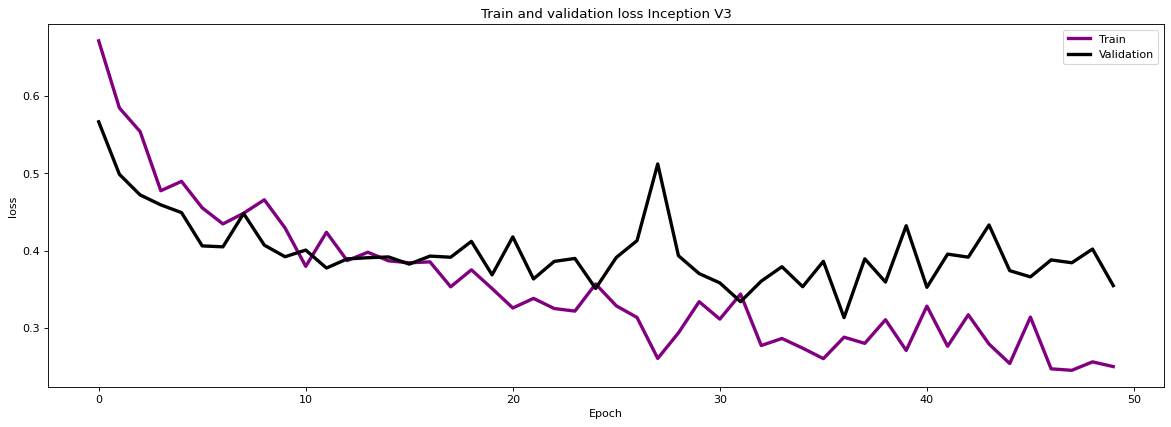

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history.history['loss'],linewidth=3,  color="purple")
plt.plot(history.history['val_loss'],linewidth=3,  color="black")
plt.title(f'Train and validation loss Inception V3')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

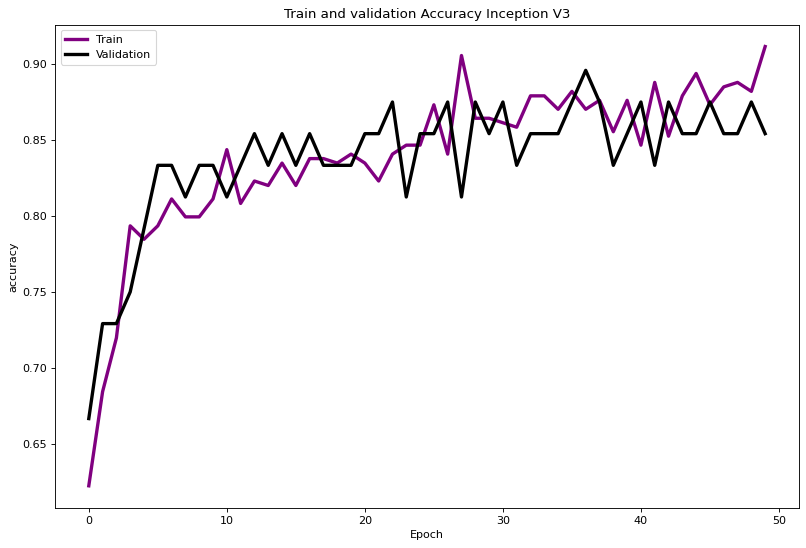

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history.history['accuracy'],linewidth=3,  color="purple")
plt.plot(history.history['val_accuracy'],linewidth=3,  color="black")
plt.title(f'Train and validation Accuracy Inception V3')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_true = []
y_pred = []
for i in range(0,len(test_generator)):
    y_true = [*y_true, *[i for i in np.argmax(test_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(test_generator[i][0]),axis=1)]]  

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        35
           1       0.82      0.81      0.82        63

    accuracy                           0.77        98
   macro avg       0.74      0.75      0.75        98
weighted avg       0.77      0.77      0.77        98



In [ ]:
## Accuracy test set
metrics.accuracy_score(y_true, y_pred)

0.7653061224489796

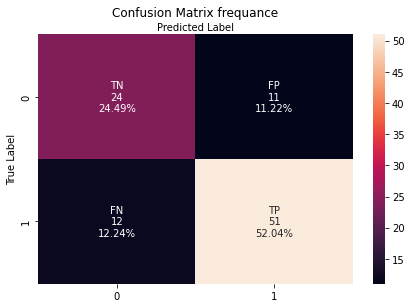

In [ ]:
matrix = metrics.confusion_matrix(y_true, y_pred)            

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix,linecolor='black', annot=labels,fmt='') 
ax.xaxis.set_label_position("top")
plt.tight_layout()   
plt.title("Confusion Matrix frequance")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
y_true = []
y_pred = []
for i in range(0,len(train_generator)):
    y_true = [*y_true, *[i for i in np.argmax(train_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(train_generator[i][0]),axis=1)]]  

In [ ]:
## Accuracy train set
metrics.accuracy_score(y_true, y_pred)

0.9941002949852508

**Adam Optimizer**

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss = tf.keras.losses.BinaryCrossentropy() ,metrics=["accuracy"])

In [ ]:
history2 = model.fit(train_generator, 
        epochs=50,
        validation_data=validation_generator,)
        #callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/50
170/170 [==============================] - 38s 204ms/step - loss: 0.6591 - accuracy: 0.5959 - val_loss: 0.5804 - val_accuracy: 0.6458
Epoch 2/50
170/170 [==============================] - 33s 197ms/step - loss: 0.6057 - accuracy: 0.6460 - val_loss: 0.5562 - val_accuracy: 0.7500
Epoch 3/50
170/170 [==============================] - 34s 197ms/step - loss: 0.5665 - accuracy: 0.6991 - val_loss: 0.5143 - val_accuracy: 0.7500
Epoch 4/50
170/170 [==============================] - 33s 197ms/step - loss: 0.5434 - accuracy: 0.7168 - val_loss: 0.4881 - val_accuracy: 0.7500
Epoch 5/50
170/170 [==============================] - 34s 197ms/step - loss: 0.5061 - accuracy: 0.7463 - val_loss: 0.4752 - val_accuracy: 0.7292
Epoch 6/50
170/170 [==============================] - 33s 197ms/step - loss: 0.5083 - accuracy: 0.7375 - val_loss: 0.4615 - val_accuracy: 0.7708
Epoch 7/50
170/170 [==============================] - 33s 197ms/step - loss: 0.5080 - accuracy: 0.7611 - val_loss: 0.4385 - val_ac

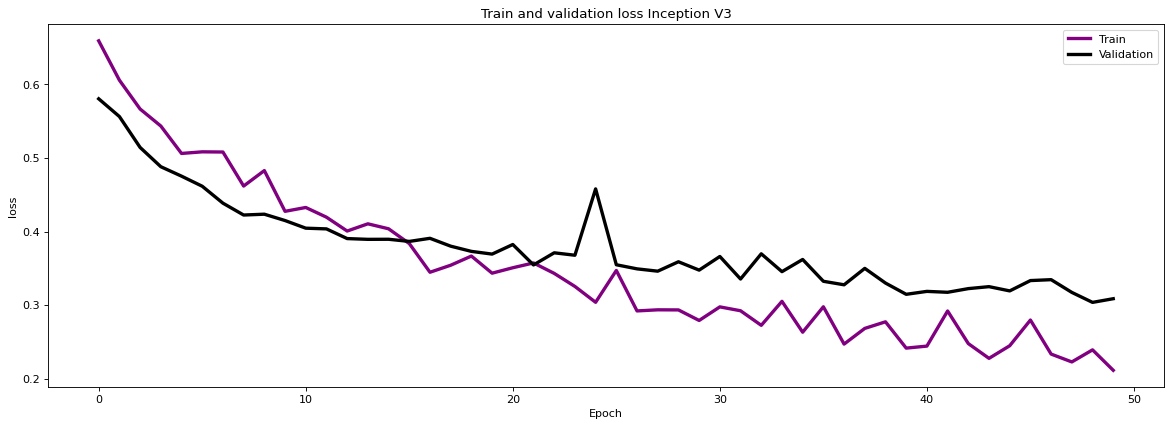

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history2.history['loss'],linewidth=3, color = 'purple')
plt.plot(history2.history['val_loss'],linewidth=3, color = 'black')
plt.title(f'Train and validation loss Inception V3')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

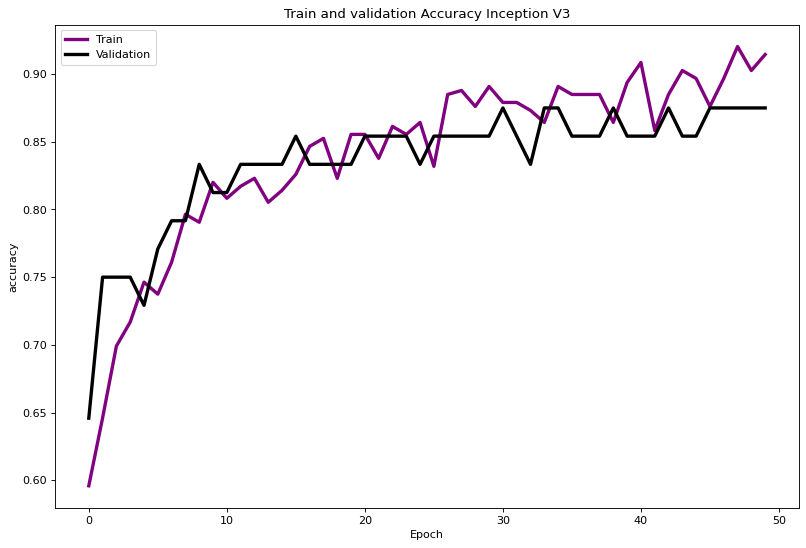

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history2.history['accuracy'],linewidth=3, color = 'purple')
plt.plot(history2.history['val_accuracy'],linewidth=3, color = 'black')
plt.title(f'Train and validation Accuracy Inception V3')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_true = []
y_pred = []
for i in range(0,len(test_generator)):
    y_true = [*y_true, *[i for i in np.argmax(test_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(test_generator[i][0]),axis=1)]]  

In [ ]:
## Accuracy test set
metrics.accuracy_score(y_true, y_pred)

0.7755102040816326

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        35
           1       0.81      0.86      0.83        63

    accuracy                           0.78        98
   macro avg       0.76      0.74      0.75        98
weighted avg       0.77      0.78      0.77        98



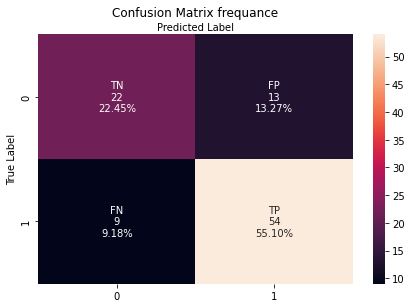

In [ ]:
matrix = metrics.confusion_matrix(y_true, y_pred)            

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix,linecolor='black', annot=labels,fmt='') 
ax.xaxis.set_label_position("top")
plt.tight_layout()   
plt.title("Confusion Matrix frequance")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
y_true = []
y_pred = []
for i in range(0,len(train_generator)):
    y_true = [*y_true, *[i for i in np.argmax(train_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(train_generator[i][0]),axis=1)]]  

In [ ]:
## Accuracy train set
metrics.accuracy_score(y_true, y_pred)

0.9734513274336283

##**Neural Network**

In [ ]:
model1 = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (400,400,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            #tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
                            #tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Flatten(),
                            #
                            tf.keras.layers.Dense(128, activation='relu'),
                            #  
                            tf.keras.layers.Dense(1, activation='sigmoid'),       
                            ])


In [ ]:
model1 = Sequential()
model1.add(Input(shape=(224,224,3)))
model1.add(GaussianNoise(0.2))
model1.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3, 3) , activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(GlobalAveragePooling2D())
#model.add(Flatten())
model1.add(Dropout(0.5))

model1.add(Dense(128, activation='relu', 
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)))

model1.add(Dense(16, activation='relu',
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)))

model1.add(Dense(2, activation='sigmoid'))

In [ ]:
#opt = SGD(learning_rate=0.0001, momentum=0.9)
model1.compile(optimizer='Adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model1.fit(train_generator, 
        epochs=200,
        validation_data=validation_generator,
        callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/200
170/170 [==============================] - 32s 180ms/step - loss: 0.7051 - accuracy: 0.6313 - val_loss: 0.6978 - val_accuracy: 0.6458
Epoch 2/200
170/170 [==============================] - 30s 178ms/step - loss: 0.6845 - accuracy: 0.6342 - val_loss: 0.8171 - val_accuracy: 0.3542
Epoch 3/200
170/170 [==============================] - 30s 178ms/step - loss: 0.6778 - accuracy: 0.6254 - val_loss: 1.0718 - val_accuracy: 0.4583
Epoch 4/200
170/170 [==============================] - 30s 177ms/step - loss: 0.6464 - accuracy: 0.6342 - val_loss: 4.6236 - val_accuracy: 0.6458
Epoch 5/200
170/170 [==============================] - 30s 179ms/step - loss: 0.6829 - accuracy: 0.6106 - val_loss: 2.9544 - val_accuracy: 0.6458
Epoch 6/200
170/170 [==============================] - 30s 179ms/step - loss: 0.6691 - accuracy: 0.6460 - val_loss: 0.9173 - val_accuracy: 0.7083
Epoch 6: early stopping


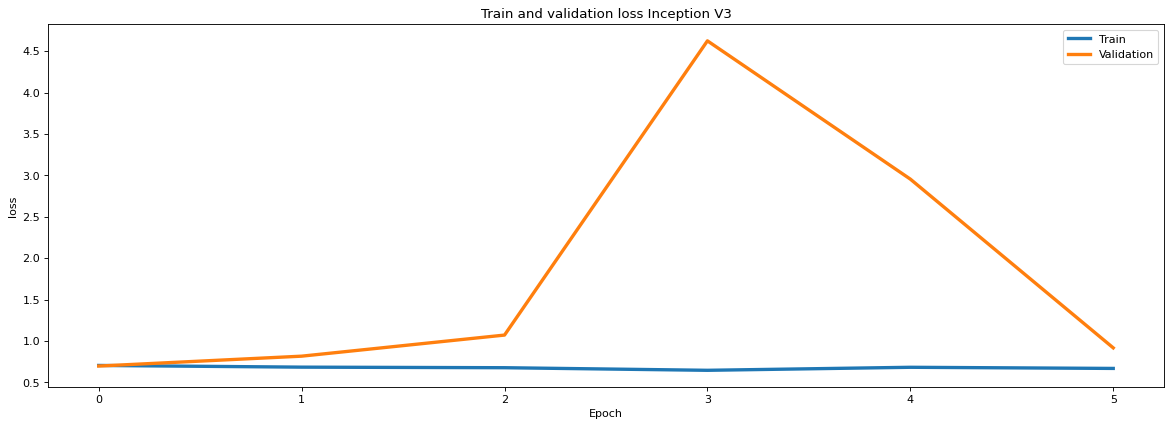

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history.history['loss'],linewidth=3)
plt.plot(history.history['val_loss'],linewidth=3)
plt.title(f'Train and validation loss Inception V3')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

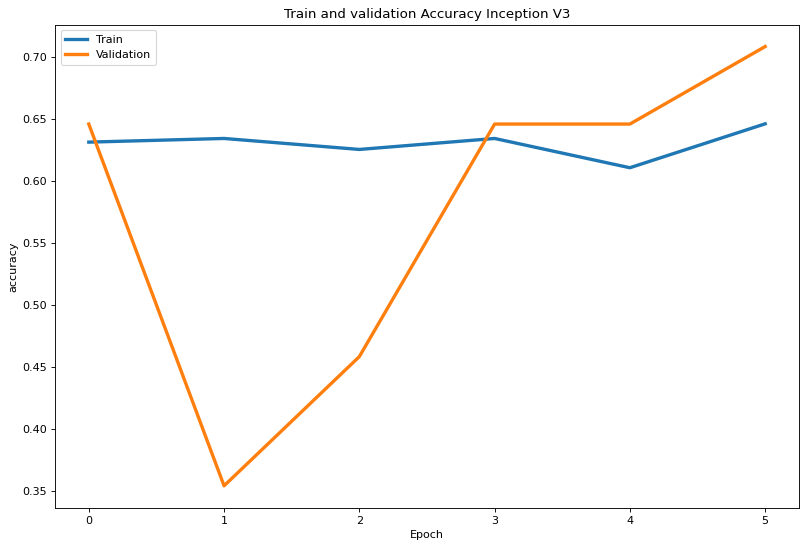

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history.history['accuracy'],linewidth=3)
plt.plot(history.history['val_accuracy'],linewidth=3)
plt.title(f'Train and validation Accuracy Inception V3')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

#**Neural Network with Fine Tuning**

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)


In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
# Set paramaters
params_nn ={
    'neurons': (2,10),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(2,4),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(neurons, activation= activation)(x)
x = Dense(neurons, activation= activation)(x)
predictions = Dense(num_classes, activation='sigmoid')(x)
nn = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = True

nn.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),loss = tf.keras.losses.BinaryCrossentropy() ,metrics=["accuracy"])

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        x = GlobalAveragePooling2D()(x)
        x = Dropout(0.5)(x)
        x = Dense(neurons, activation= activation)(x)
        x = Dense(neurons, activation= activation)(x)
        predictions = Dense(num_classes, activation='sigmoid')(x)
        nn = Model(inputs=base_model.input, outputs=predictions)
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
dataset = datagen.flow_from_directory('/content/gdrive/MyDrive/Data/output1/train', class_mode='binary')

X, Y = dataset.next()

Found 339 images belonging to 2 classes.


In [ ]:
y_train = np.asarray(Y).astype('float32').reshape((-1,1))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam',neurons = 4, activation = 'relu'):
	# create model
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  x = Dense(neurons, activation=activation)(x)
  x = Dense(neurons, activation=activation)(x)
  predictions = Dense(1, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
#  for layer in base_model.layers:
#    layer.trainable = False
  model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
  return model

In [ ]:
#model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

model1 = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
neurons = [4,8,16,32]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
activation = ['softmax',  'relu', 'tanh']
#batch_size = [2,4]
#epochs = [10, 50, 100] batch_size=batch_size, epochs=epochs,
param_grid = dict( optimizer=optimizer, neurons = neurons, activation = activation )
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search_cv=GridSearchCV(model1,param_grid,verbose=1,cv=3)#,scoring=scorers,refit="precision_score")
grid_result = grid_search_cv.fit(X, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  import sys


Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.751515 using {'activation': 'softmax', 'neurons': 4, 'optimizer': 'RMSprop'}
0.500000 (0.037113) with: {'activation': 'softmax', 'neurons': 4, 'optimizer': 'SGD'}
0.751515 (0.034284) with: {'activation': 'softmax', 'neurons': 4, 'optimizer': 'RMSprop'}
0.530303 (0.021427) with: {'activation': 'softmax', 'neurons': 4, 'optimizer': 'Adagrad'}
0.500000 (0.037113) with: {'activation': 'softmax', 'neurons': 4, 'optimizer': 'Adadelta'}
0.657576 (0.080060) with: {'activation': 'softmax', 'neurons': 4, 'optimizer': 'Adam'}
0.503030 (0.068568) with: {'activation': 'softmax', 'neurons': 4, 'optimizer': 'Adamax'}
0.469697 (0.021427) with: {'activation': 'softmax', 'neurons': 8, 'optimizer': 'SGD'}
0.596970 (0.165367) with: {'activation': 'softmax', 'neurons': 8, 'optimizer': 'RMSprop'}
0.469697 (0.021427) with: {'activation': 'softmax', 'neurons': 8, 'optimizer': 'Adagrad'}
0.469697 (0.021427) with: {'activation': 'softmax', 'neurons': 8, 'optimizer': 'Adadelta'}
0.596970 (0.104006) with:

In [ ]:
y_true = []
y_pred = []
for i in range(0,len(test_generator)):
    y_true = [*y_true, *[i for i in np.argmax(test_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(test_generator[i][0]),axis=1)]]  

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
## Batch size and Number of epochs

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
## Training optimization algorithm

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
##Learning rate
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
## Weight Intialization

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
## Dropout Regularization
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
## Number of Neuron in the Hidden Layer
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
## 

In [ ]:
######

	model = Sequential()
  model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(12, input_dim=8, activation='relu'))
  model.add(Dropout(dropout_rate))
	model.add(Dense(1, activation='sigmoid'))
  model.add(Dense(neurons, input_dim=8, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
  model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))

#**Segmentation**

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/RIM-ONE_DL_images", output="/content/gdrive/MyDrive/Data/output2",
    seed=1337, ratio=(.7, .1, .2), group_prefix=None, move=False) # default values

Copying files: 485 files [00:04, 102.55 files/s]


In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 400
IMG_HEIGHT = 400
IMG_CHANNELS = 3


train_ids = 281
test_ids = 32

X_train = np.zeros((train_ids, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))#, dtype=np.uint8)
Y_train = np.zeros((train_ids, IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)


    ######################## disc mask  ##########################

print('Resizing training images and masks')
index = 1
for n in range(281):   
    img = resize(n_img[n], (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img


    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    mask = resize(n_mask[index], (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
    Y_train[n] = mask
    index = index + 2

# test images
X_test = np.zeros((test_ids, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))#, dtype=np.uint8)
sizes_test = []

index = 0
print('Resizing test images') 
for n in range(281, len(n_img)):
    img = resize(n_img[n], (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[index] = img
    index = index + 1

print('Done!')






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Resizing training images and masks
Resizing test images
Done!


In [ ]:
Y_train[0].shape

(400, 400, 1)

140


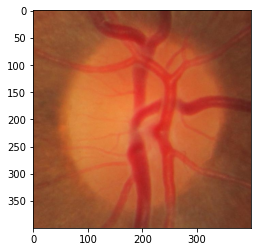

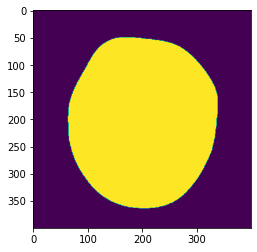

In [ ]:
image_x = random.randint(0, train_ids)
print(image_x)
plt.imshow(X_train[image_x])
plt.show()
plt.imshow(Y_train[image_x].reshape(400,400))
plt.show()

In [ ]:
#Build the model

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(s)
#conv1 = BatchNormalization()(conv1)
drop1 = Dropout(0.3)(conv1)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(drop1) 
#conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
#conv2 = BatchNormalization()(conv2)
drop2 = Dropout(0.3)(conv2)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
#conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)#conv4

conv5 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = BatchNormalization()(conv5)
conv5 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
conv5 = BatchNormalization()(conv5)
drop5 = Dropout(0.5)(conv5)


up8 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = BatchNormalization()(conv8)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
conv8 = BatchNormalization()(conv8)
up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(32 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = BatchNormalization()(conv9)
conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)
#conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer = Adam(lr = 1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 400, 400, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 400, 400, 64  1792        ['lambda_1[0][0]']               
                                )                                                                 
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2d_17 (Conv2D)             (None, 400, 400, 1)  3           ['batch_normalization_14[0][0]'] 
                                                                                                  
Total params: 4,067,085
Trainable params: 4,063,497
Non-trainable params: 3,588
__________________________________________________________________________________________________


In [ ]:
################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1 , batch_size=2, epochs=30, callbacks=callbacks)

####################################


Epoch 1/30
126/126 [==============================] - 153s 1s/step - loss: 0.3178 - accuracy: 0.8721 - val_loss: 0.8687 - val_accuracy: 0.5923
Epoch 2/30
126/126 [==============================] - 132s 1s/step - loss: 0.2725 - accuracy: 0.9005 - val_loss: 1.0566 - val_accuracy: 0.5993
Epoch 3/30
126/126 [==============================] - 131s 1s/step - loss: 0.2490 - accuracy: 0.9117 - val_loss: 0.8052 - val_accuracy: 0.5973
Epoch 4/30
126/126 [==============================] - 131s 1s/step - loss: 0.2600 - accuracy: 0.9043 - val_loss: 0.7626 - val_accuracy: 0.6423
Epoch 5/30
126/126 [==============================] - 132s 1s/step - loss: 0.2481 - accuracy: 0.9096 - val_loss: 0.7726 - val_accuracy: 0.6533
Epoch 6/30
126/126 [==============================] - 131s 1s/step - loss: 0.2310 - accuracy: 0.9162 - val_loss: 0.5754 - val_accuracy: 0.6981
Epoch 7/30
126/126 [==============================] - 131s 1s/step - loss: 0.2107 - accuracy: 0.9262 - val_loss: 0.7141 - val_accuracy: 0.6706

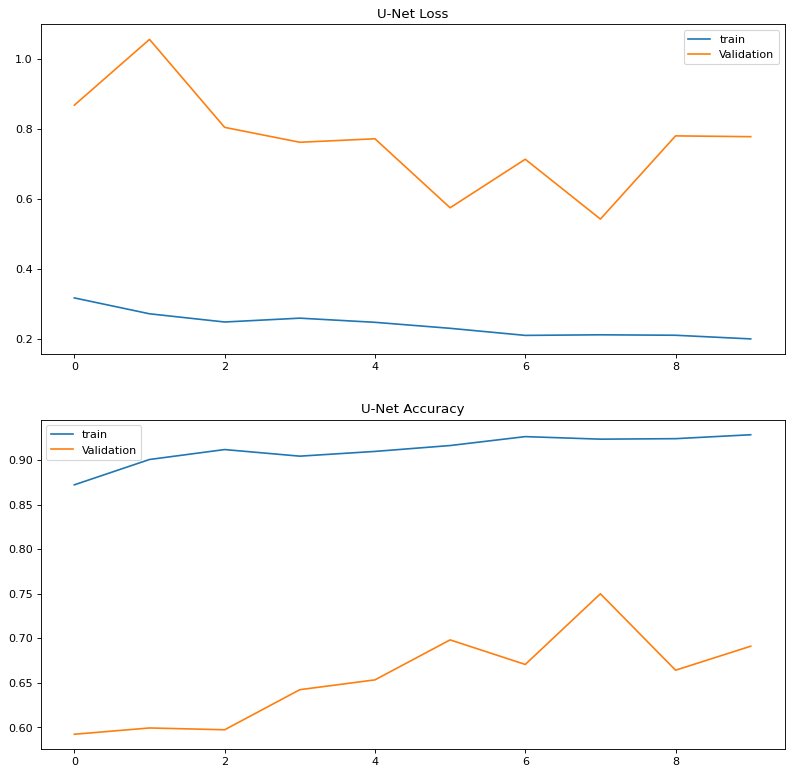

In [ ]:

plt.figure(figsize=(12,12),dpi=80, facecolor='w', edgecolor='k')
# plot loss during training
plt.subplot(211)
plt.title('U-Net Loss')
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='Validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('U-Net Accuracy')
plt.plot(results.history['accuracy'], label='train')
plt.plot(results.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [ ]:
model.save('/content/gdrive/MyDrive/myModel')
model.save_weights('/content/gdrive/MyDrive/model_Unet.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('/content/gdrive/MyDrive/myModel')
new_model.load_weights('/content/gdrive/MyDrive/model_Unet.h5')


In [ ]:
#idx = random.randint(0, len(X_train))

%clear
preds_train = new_model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = new_model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)




In [ ]:
preds_test = new_model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5)#.astype(np.uint8)
preds_val_t = (preds_val > 0.5)#.astype(np.uint8)
preds_test_t = (preds_test > 0.5)#.astype(np.uint8)

1/1 [==============================] - 106s 106s/step


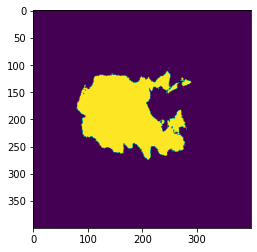

In [ ]:
plt.imshow(preds_test_t[16].reshape(400,400))

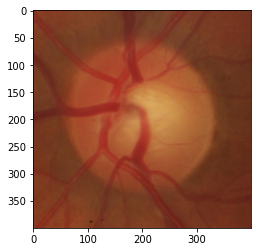

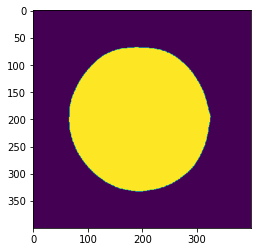

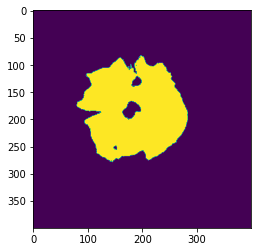

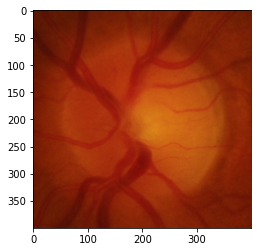

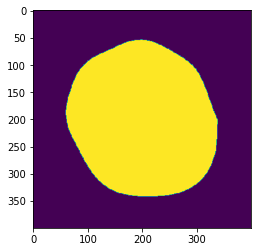

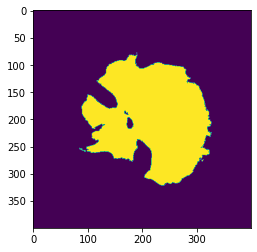

In [ ]:

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
plt.imshow(X_train[ix])
plt.show()
plt.imshow(Y_train[ix].reshape(400,400))
plt.show()
plt.imshow(preds_train_t[ix].reshape(400,400))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
plt.imshow(Y_train[int(Y_train.shape[0]*0.9):][ix].reshape(400,400))
plt.show()
plt.imshow(preds_val_t[ix].reshape(400,400))
plt.show()

In [ ]:


data_gen_args = dict()
myGene = trainGenerator(4,'/content/drive/My Drive/GD/Training','Images','OD avg',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab_Project/Weights/unet_membrane_15rd.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=175,epochs=15,callbacks=[model_checkpoint])



In [ ]:


testGene = testGenerator("/content/drive/My Drive/GD/Testing/Images")
model = unet()
model.load_weights("/content/drive/My Drive/GD/Testing/Weights/unet_membrane_15rd.hdf5")
results = model.predict_generator(testGene,51,verbose=1)
#predicted_image_binary = results > 0.5
saveResult("/content/drive/My Drive/Colab_Project/pred_od",results)



#**EXTRA**

(547, 547)
0


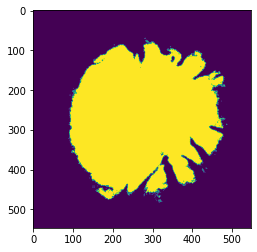

In [ ]:
from PIL import Image

#img = Image.open('/content/RIM-ONE_DL_images/glaucoma/r1_Im069.png')
im_gray = cv2.imread('/content/RIM-ONE_DL_images/glaucoma/r1_Im069.png', cv2.IMREAD_GRAYSCALE)
#pixels = im_gray.load()
print(im_gray.shape)
width, height = im_gray.shape
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
width, height = im_bw.shape
for x in range(width):
    for y in range(height):
        print(im_bw[x, y])
        break
    break
        
        # in case your image has an alpha channel
        # r, g, b, a = pixels[x, y]

        #print(x, y, f"#{r:02x}{g:02x}{b:02x}")
plt.imshow(im_bw)

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/RIM-ONE_DL_images", output="/content/gdrive/MyDrive/Data/output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values




Copying files: 485 files [00:10, 48.45 files/s]


In [ ]:
datasetUrl = '/content/gdrive/MyDrive/Data/output'
target_size = (547, 547)
batch_size = 32

num_classes = 2    

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             featurewise_center=True,
                             samplewise_center=True,
                             featurewise_std_normalization=True,
                             samplewise_std_normalization=True,
                             zca_whitening=True,
                             zca_epsilon=1e-03,
                             rotation_range=0,
                             width_shift_range=0,
                             height_shift_range=0,
                             brightness_range=[1,1],
                             shear_range=1,
                             zoom_range=0,                             
                             fill_mode="nearest",
                             cval=0.5)
                             #horizontal_flip=True,
                             #vertical_flip=True)

train_data = train_datagen.flow_from_directory(
        f'{datasetUrl}/train', 
        target_size=target_size,
        batch_size=batch_size,
      #  color_mode = 'grayscale',
        class_mode='categorical')
        #classes = groups )  # since we use binary_crossentropy loss, we need binary labels        


#validation_datagen = ImageDataGenerator(rescale=1./255)

validation_data = train_datagen.flow_from_directory(
        f'{datasetUrl}/val', 
        target_size=target_size,
        batch_size=batch_size,
       # color_mode = 'grayscale',
        class_mode='categorical')
        #classes = groups )  # since we use binary_crossentropy loss, we need binary labels 


test_datagen = ImageDataGenerator(rescale=1./255,
                                featurewise_center=True,
                                samplewise_center=True,
                                featurewise_std_normalization=True,
                                samplewise_std_normalization=True)

test_data = test_datagen.flow_from_directory(
        f'{datasetUrl}/test', 
        target_size=target_size,
        batch_size=batch_size,
       # color_mode = 'grayscale',
        class_mode='categorical')
        #classes = groups )  # since we use binary_crossentropy loss, we need binary labels 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 387 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


(547, 547, 3)


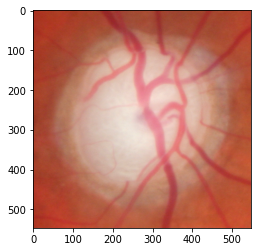

In [ ]:
fpath= r'/content/output/train/glaucoma/r1_Im069.png'
img=plt.imread(fpath)
print (img.shape)
plt.imshow(img)



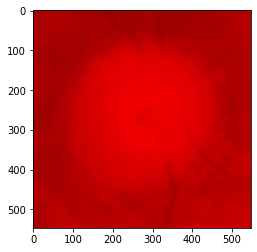

In [ ]:
img[:,:,1] = 0
img[:,:,2] = 0
plt.imshow(img)

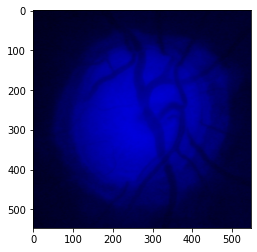

In [ ]:
img[:,:,0] = 0
img[:,:,1] = 0
plt.imshow(img)

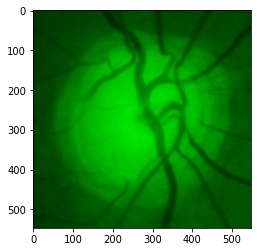

In [ ]:
img[:,:,0] = 0
img[:,:,2] = 0
plt.imshow(img)

(547, 547, 3)


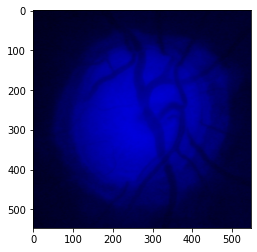

In [ ]:
fpath= r'/content/output/train/glaucoma/r1_Im069.png'
img=plt.imread(fpath)
print (img.shape)
plt.imshow(img)

img[:,:,0] = 0
#img[:,:,2] = 0
img[:,:,1] = 0
plt.imshow(img)

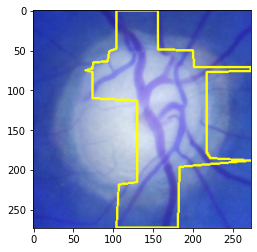

In [ ]:
import cv2
import numpy as np

def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
    img_blur = cv2.GaussianBlur(img_gray, (11, 11), 10)
    img_canny = cv2.Canny(img_blur, 0, 36)
    kernel = np.ones((25, 25))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=4)
    img_erode = cv2.erode(img_dilate, kernel, iterations=4)
    return img_erode

def draw_contours(img):
    contours, hierarchies = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnt = max(contours, key=cv2.contourArea)
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.004 * peri, True)
    cv2.drawContours(img, [approx], -1, (255, 255, 0), 2)

img = cv2.imread("/content/output/train/glaucoma/r1_Im069.png")
h, w, c = img.shape

img = cv2.resize(img, (w // 2, h // 2))
draw_contours(img)

plt.imshow(img)
#cv2.waitKey(0)



#**Pre Trained Model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
history = model.fit_generator(train_data,
        epochs=100,
        validation_data=validation_data,
        callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
13/13 [==============================] - 55s 3s/step - loss: 0.6748 - accuracy: 0.6305 - val_loss: 0.6444 - val_accuracy: 0.6458
Epoch 2/100
13/13 [==============================] - 33s 3s/step - loss: 0.6298 - accuracy: 0.6512 - val_loss: 0.6172 - val_accuracy: 0.6458
Epoch 3/100
13/13 [==============================] - 33s 3s/step - loss: 0.5985 - accuracy: 0.6796 - val_loss: 0.5537 - val_accuracy: 0.7292
Epoch 4/100
13/13 [==============================] - 33s 3s/step - loss: 0.5739 - accuracy: 0.7080 - val_loss: 0.5208 - val_accuracy: 0.7500
Epoch 5/100
13/13 [==============================] - 33s 3s/step - loss: 0.5651 - accuracy: 0.7106 - val_loss: 0.6270 - val_accuracy: 0.7083
Epoch 6/100
13/13 [==============================] - 33s 3s/step - loss: 0.6487 - accuracy: 0.6718 - val_loss: 0.7086 - val_accuracy: 0.6458
Epoch 7/100
13/13 [==============================] - 33s 3s/step - loss: 0.5335 - accuracy: 0.7519 - val_loss: 0.6271 - val_accuracy: 0.5833
Epoch 8/100
1

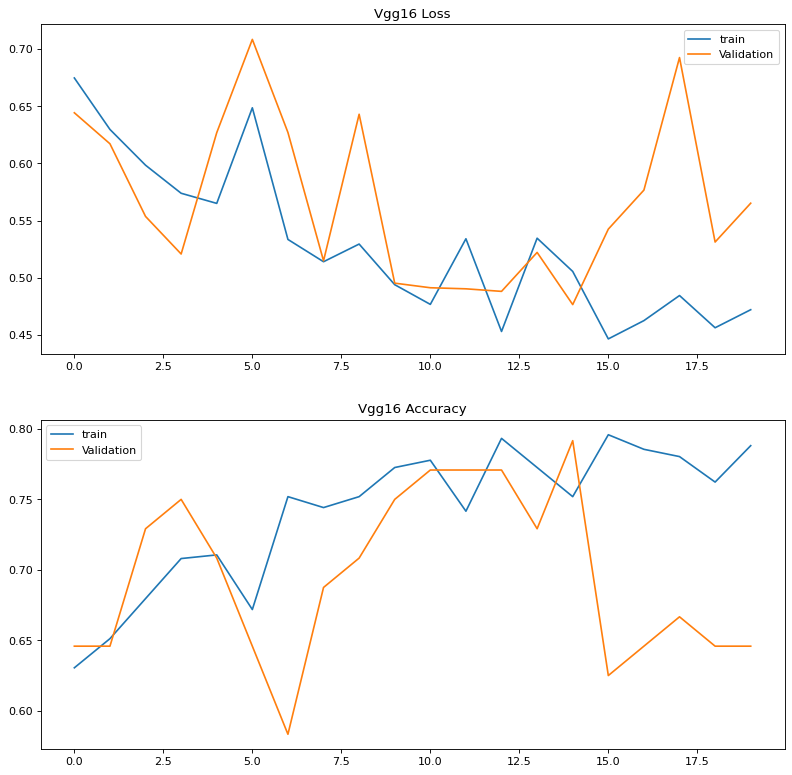

In [ ]:
plt.figure(figsize=(12,12),dpi=80)
# plot loss during training
plt.subplot(211)
plt.title('Vgg16 Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Vgg16 Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [ ]:
train_data.class_indices

{'glaucoma': 0, 'normal': 1}

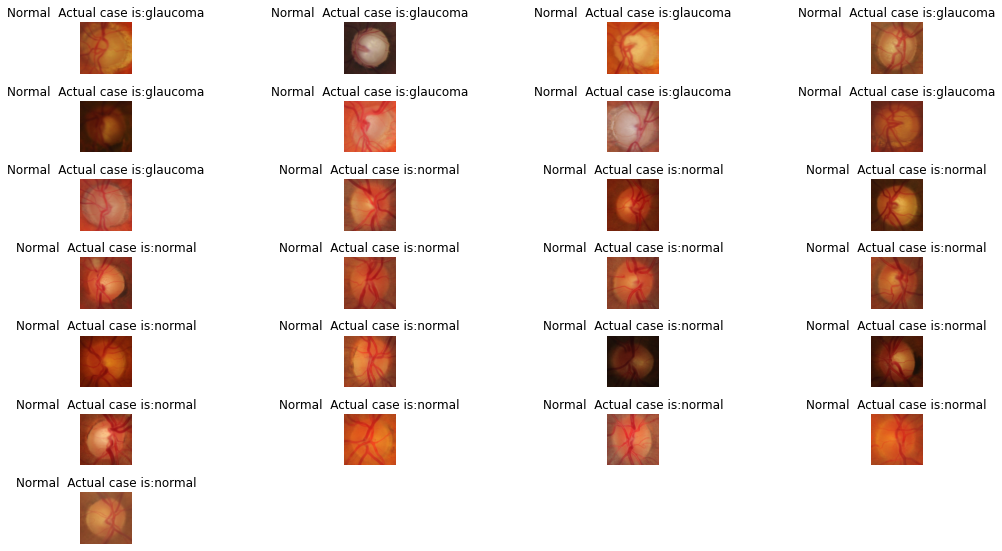

In [ ]:
y_true = []
y_pred = []

dir_path = '/content/output/test/'
fig = plt.figure(figsize=(15, 8))
rows = 7
columns = 4
num = 1
counter = 1
for i in os.listdir(dir_path):
  img_path = dir_path + str(i)
  for j in os.listdir(img_path): 
    img = image.load_img(img_path + '/' + j, target_size=(250, 700,3) )
    img1 = image.load_img(img_path + '/' + j)
    #plt.figure(figsize=(15, 50))

    counter = counter + 1
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    #print(val)
    index = np.argmax(val)
    #y_true.append(int(i))
    '''
    if index == 0:
      y_pred.append(1)
    elif index == 1:
        y_pred.append(2)
    elif index == 2:
        y_pred.append(3)
    '''    
   
    if counter % 2 == 0 :
      fig.add_subplot(rows, columns, num)
      fig.tight_layout()
      plt.imshow(img1)
      
      plt.axis('off')
      
      num = num + 1   

      if index == 0:
        plt.title("Glaucoma  Actual case is:" +str(i))
      elif index == 1:
        plt.title("Normal  Actual case is:" +str(i))




#Github Dataset
Contains 287 glaucoma images and 232 not glaucoma images.

In [ ]:
!git clone https://github.com/kr-viku/GLAUCOMA-DETECTION.git Data

In [ ]:

im = Image.open('/content/Data/dataset/train/class0/Im002.jpg')


In [ ]:
im.size

In [ ]:
import glob
class0_train = glob.glob('/content/Data/dataset/train/class0' + '/*.jpg')
class1_train = glob.glob('/content/Data/dataset/train/class1' + '/*.jpg')
class0_test = glob.glob('/content/Data/dataset/test/class0' + '/*.jpg')
class1_test = glob.glob('/content/Data/dataset/test/class1' + '/*.jpg')

In [ ]:
print(len(class0_train),len(class1_train), len(class0_test), len(class1_test))


#Kaggle Dataset

Contains 1711 glaucoma images and 3143 non glaucoma.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle

In [ ]:
!kaggle datasets download -d sreeharims/glaucoma-dataset

In [ ]:
!unzip \*.zip

In [ ]:
import os
train = os.listdir('LAG/train')
test = os.listdir('LAG/test')
val = os.listdir('LAG/validation')

In [ ]:
train_g = []
train_ng = []
test_g = []
test_ng = []
val_g = []
val_ng = []

In [ ]:
for name in train:
  if name[0]=='g':
    train_g.append(name)
  else:
    train_ng.append(name)


for name in test:
  if name[0]=='g':
    test_g.append(name)
  else:
    test_ng.append(name)


for name in val:
  if name[0]=='g':
    val_g.append(name)
  else:
    val_ng.append(name)

In [ ]:
print(len(train), len(test),len(val))

In [ ]:
print(len(train_g), len(train_ng),'\n', len(test_g), len(test_ng), '\n', len(val_g), len(val_ng))

In [ ]:
train_g[0]

In [ ]:
for image in val_ng:
    im = Image.open('LAG/validation/'+image)
    if im.size != (500, 500):
      print("Hi")

In [ ]:
drive.mount('/content/drive')

In [ ]:
import pathlib
data_url = pathlib.Path('/content/drive/MyDrive/Bayan_MasterThesis_HSE/Dataset/Eyepacs_Data/Eyespace.zip') 

In [ ]:
!unzip -n '/content/drive/MyDrive/Bayan_MasterThesis_HSE/Dataset/Eyepacs_Data/Eyespace.zip'

In [ ]:
import os
X = os.listdir('eyepacs_all_ims')
print(len(X))

In [ ]:
X[0]

In [ ]:
img = imread(os.path.join("eyepacs_all_ims", X[0]))

In [ ]:
"eyepacs_all_ims/"+X[0]

In [ ]:
im = Image.open("eyepacs_all_ims/"+X[0])

#show image
im.size

In [ ]:
for i in range(0,len(X)):
  im = Image.open("eyepacs_all_ims/"+X[i])
  if im.size != (896,896):
    print(im.size , i)
    
    



In [ ]:
import pandas as pd

In [ ]:

url='/content/drive/MyDrive/Bayan_MasterThesis_HSE/Dataset/Eyepacs_Data/train_eyepacs.csv'
df_train = pd.read_csv(url)
df_train.head()
print(len(df_train))

In [ ]:
url='/content/drive/MyDrive/Bayan_MasterThesis_HSE/Dataset/Eyepacs_Data/test_eyepacs.csv'
df_test = pd.read_csv(url)
df_test.head()
print(len(df_test))

In [ ]:
url='/content/drive/MyDrive/Bayan_MasterThesis_HSE/Dataset/Eyepacs_Data/val_eyepacs.csv'
df_val = pd.read_csv(url)
df_val.head()
print(len(df_val))

In [ ]:
x = len(df_train)+len(df_test)+len(df_val)
x

In [ ]:
df_train.head()

In [ ]:
df_train.hist(column = 'dr',
        grid=False,
        figsize=(10, 4),
        legend=True,
        orientation='horizontal',
        color='#FFCF56');

count = df_train['dr'].value_counts()
print(count)

In [ ]:
df_test.hist(column = 'dr',
        grid=False,
        figsize=(10, 4),
        legend=True,
        orientation='horizontal',
        color='#FCCCFF');
count = df_test['dr'].value_counts()
print(count)

In [ ]:
df_val.hist(column = 'dr',
        grid=False,
        figsize=(10, 4),
        legend=True,
        orientation='horizontal',
        color='#AACCFF');
count = df_val['dr'].value_counts()
print(count)

In [ ]:
#df_train.dr.value_counts().loc[[0, 1, 2,3,4]].plot.bar()